![cover](./images/spotify_cover.jpg)

[Image](https://www.edmsauce.com/wp-content/uploads/2017/01/6360041936368655181636978495_shutterstock_200035424.jpg)

# what's spoppin?
Author: Erin Vu


## Overview

This project is an analysis and prediction of [popularity of Spotify tracks from the Kaggle datset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) in order to provide music production companies with a good idea of the attributes of popular songs. As a result of iterating through linear regression and random forest regression models, the most impactful feature through random forest regression was acousticness and can recommend to not release primarily acoustic songs. 

## Business problem

The business problem for our music production stakeholders is what attributes make a popular song. Music production companies need to know generally what people like to listen to, and with this project we can find those optimal features. We will be using linear regression and random forest regression to predict popularity of songs based on the feature data. With this information, production companies will be able to produce new popular songs.


## Data Understanding

The Spotfy dataset from Kaggle has almost 600,000 songs from the years 1922-2021, and has 20 columns. The target variable is Popularity and the other features wil be used to predict the target variable. The variables are listed below as they were in the dataset descriptionset on Kaggle and the main predictor variables for this will be the numerical features such as acousticness, danceability, energy, etc.

Primary:

- id (Id of track generated by Spotify)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action="ignore")
import pickle

In [2]:
tracks = pd.read_csv('./data/tracks.csv')

In [3]:
tracks

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['Uli']   
1                0        98200         0              ['Fernando Pessoa']   
2                0       181640         0              ['Ignacio Corsini']   
3                0       176907         0              ['Ignacio Corsini']   
4                0       163080         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50       258267         0                      ['阿YueYue']   
586668          72       153293         0                   ['ROLE MODEL']   
586669          70       187601         0                      ['FINNEAS']   
586670          58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671          38       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.645  0.4450    0   -13.338     1       0.4510         0.674   
1              0.695  0.2630    0   -22.136     1       0.9570         0.797   
2              0.434  0.1770    1   -21.180     1       0.0512         0.994   
3              0.321  0.0946    7   -27.961     1       0.0504         0.995   
4              0.402  0.1580    3   -16.900     0       0.0390         0.989   
...              ...     ...  ...       ...   ...          ...           ...   
586667         0.560  0.5180    0    -7.471     0       0.0292         0.785   
586668         0.765  0.6630    0    -5.223     1       0.0652         0.141   
586669         0.535  0.3140    7   -12.823     0       0.0408         0.895   
586670         0.696  0.6150   10    -6.212     1       0.0345         0.206   
586671         0.686  0.7230    6    -7.067     1       0.0363         0.105   

        instrumentalness  liveness  valence    tempo  time_signature  
0               0.744000    0.1510   0.1270  104.851               3  
1               0.000000    0.1480   0.6550  102.009               1  
2               0.021800    0.2120   0.4570  130.418               5  
3               0.918000    0.1040   0.3970  169.980               3  
4               0.130000    0.311

In [4]:
# Dropping columns without predictor value
tracks.drop(['id', 'name', 'id_artists'], axis=1, inplace=True)

In [5]:
# Converting release date to year
tracks['release_date'] = pd.to_datetime(tracks['release_date'])
tracks['release_date'] = tracks['release_date'].dt.year

In [6]:
# Checking for any duplicates
tracks.duplicated().sum()

2009

In [7]:
# Dropping duplicates
tracks = tracks.drop_duplicates()

In [8]:
#Checking for any missing values
tracks.isna().sum()

popularity          0
duration_ms         0
explicit            0
artists             0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        584663 non-null  int64  
 1   duration_ms       584663 non-null  int64  
 2   explicit          584663 non-null  int64  
 3   artists           584663 non-null  object 
 4   release_date      584663 non-null  int64  
 5   danceability      584663 non-null  float64
 6   energy            584663 non-null  float64
 7   key               584663 non-null  int64  
 8   loudness          584663 non-null  float64
 9   mode              584663 non-null  int64  
 10  speechiness       584663 non-null  float64
 11  acousticness      584663 non-null  float64
 12  instrumentalness  584663 non-null  float64
 13  liveness          584663 non-null  float64
 14  valence           584663 non-null  float64
 15  tempo             584663 non-null  float64
 16  time_signature    58

#### Target: Popularity Analysis

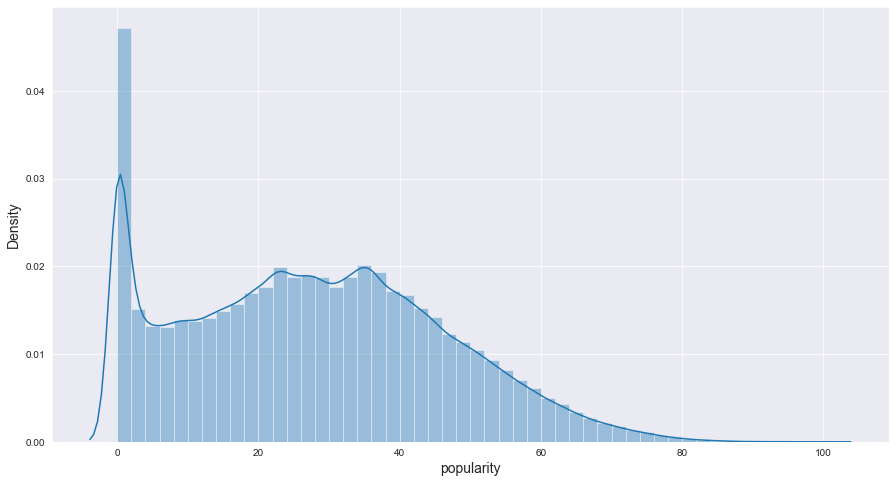

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['popularity'], ax=ax)
ax.set_xlabel(tracks['popularity'].name, fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.savefig('./images/pop_dist', bbox_inches='tight');

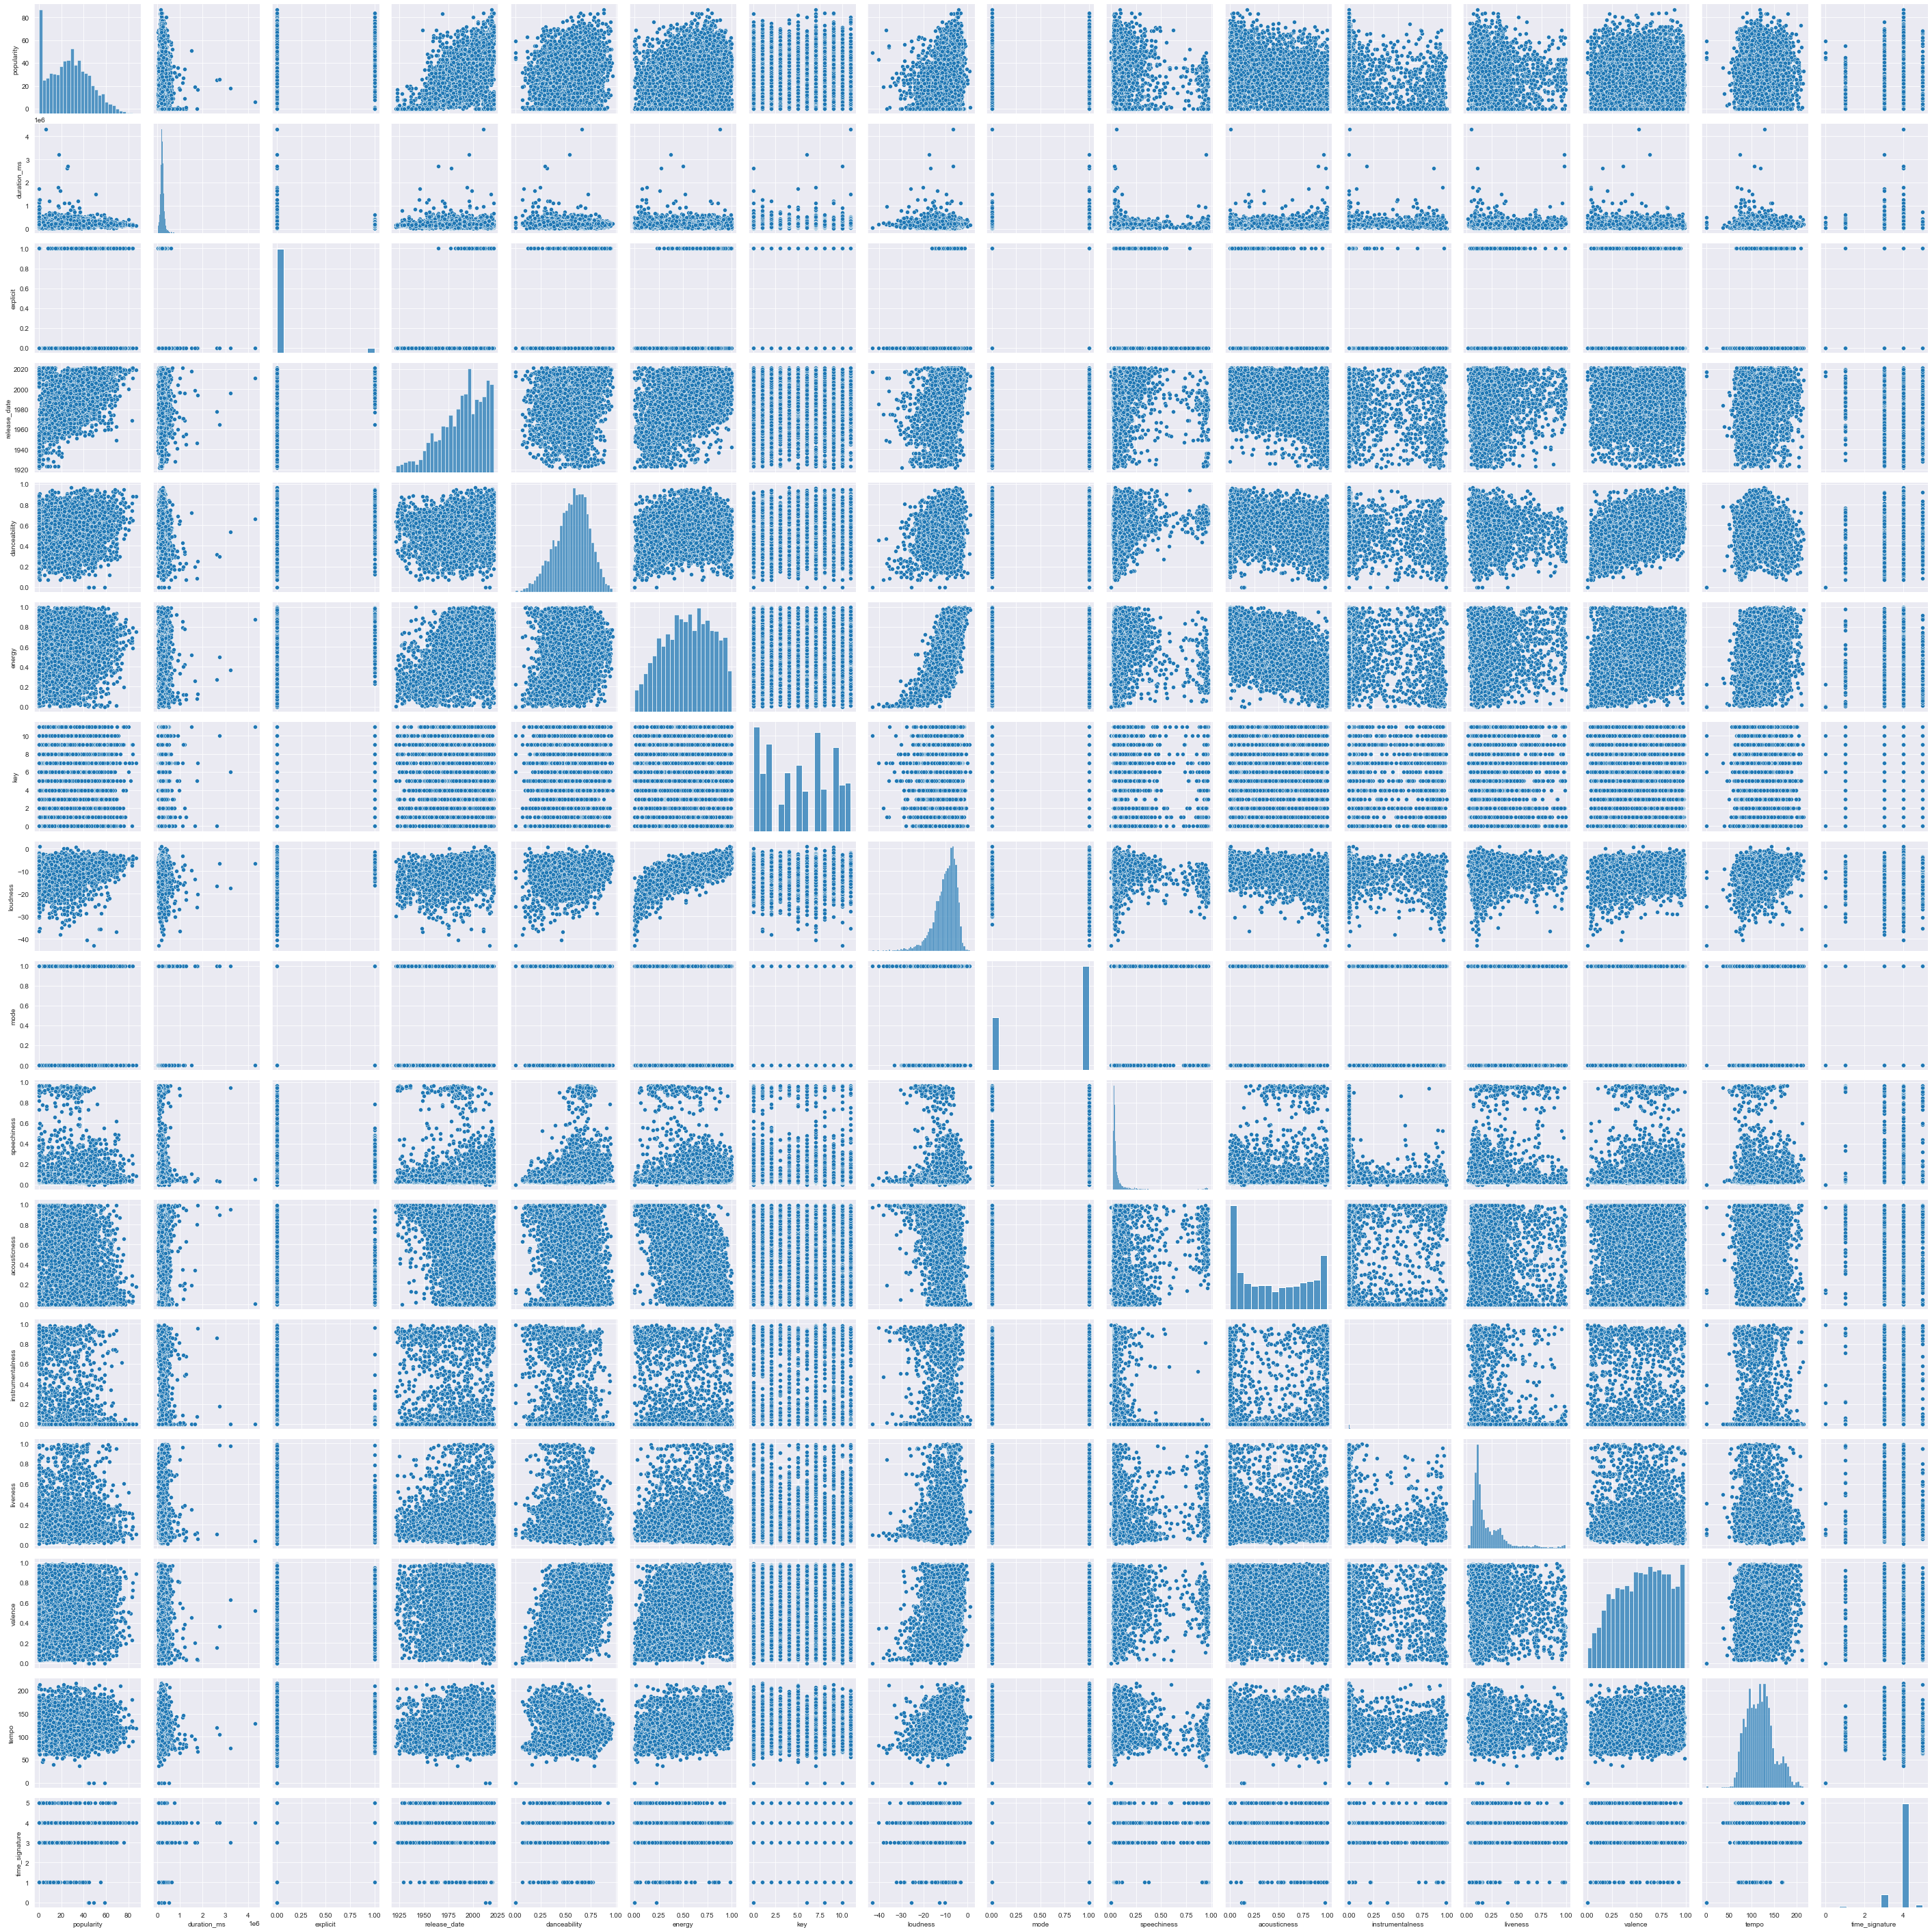

In [11]:
sns.pairplot(tracks.sample(5000))

In [12]:
pop_corr = abs(tracks.corr()[['popularity']]).sort_values('popularity', ascending=False)
pop_corr

popularity
popularity          1.000000
release_date        0.594047
acousticness        0.372003
loudness            0.328481
energy              0.302996
instrumentalness    0.234479
explicit            0.212535
danceability        0.188019
time_signature      0.086895
tempo               0.070704
liveness            0.049658
speechiness         0.048057
mode                0.034274
duration_ms         0.028155
key                 0.015541
valence             0.003715

In [13]:
pop_corr.index

Index(['popularity', 'release_date', 'acousticness', 'loudness', 'energy',
       'instrumentalness', 'explicit', 'danceability', 'time_signature',
       'tempo', 'liveness', 'speechiness', 'mode', 'duration_ms', 'key',
       'valence'],
      dtype='object')

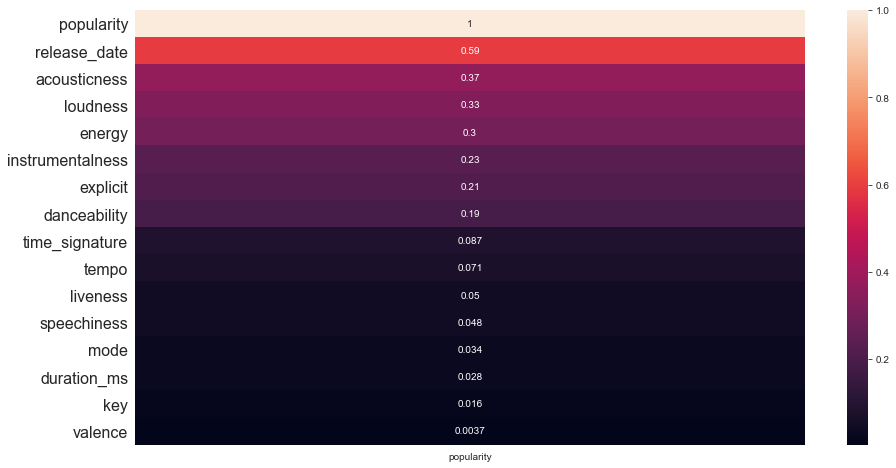

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=16)
plt.savefig('./images/heatmap');

In [15]:
corr = abs(tracks.corr())
corr

popularity  duration_ms  explicit  release_date  \
popularity          1.000000     0.028155  0.212535      0.594047   
duration_ms         0.028155     1.000000  0.016704      0.054240   
explicit            0.212535     0.016704  1.000000      0.208672   
release_date        0.594047     0.054240  0.208672      1.000000   
danceability        0.188019     0.120677  0.150154      0.224035   
energy              0.302996     0.024675  0.123059      0.457994   
key                 0.015541     0.004450  0.011253      0.023735   
loudness            0.328481     0.000144  0.134764      0.445148   
mode                0.034274     0.027686  0.051561      0.080891   
speechiness         0.048057     0.126073  0.102188      0.082645   
acousticness        0.372003     0.064318  0.148970      0.525542   
instrumentalness    0.234479     0.068563  0.067146      0.219534   
liveness            0.049658     0.002298  0.012922      0.020711   
valence             0.003715     0.162754  0.016675      0.026629   
tempo               0.070704     0.001220  0.005529      0.119439   
time_signature      0.086895     0.037334  0.044443      0.115458   

                  danceability    energy       key  loudness      mode  \
popularity            0.188019  0.302996  0.015541  0.328481  0.034274   
duration_ms           0.120677  0.024675  0.004450  0.000144  0.027686   
explicit              0.150154  0.123059  0.011253  0.134764  0.051561   
release_date          0.224035  0.457994  0.023735  0.445148  0.080891   
danceability          1.000000  0.239871  0.018779  0.249385  0.044294   
energy                0.239871  1.000000  0.036317  0.764628  0.065009   
key                   0.018779  0.036317  1.000000  0.026880  0.129845   
loudness              0.249385  0.764628  0.026880  1.000000  0.040303   
mode                  0.044294  0.065009  0.129845  0.040303  1.000000   
speechiness           0.199376  0.053866  0.001058  0.168166  0.018056   
acousticness          0.241448  0.714777  0.027504  0.519031  0.058487   
instrumentalness      0.225427  0.194523  0.006878  0.328639  0.010182   
liveness              0.106161  0.124991  0.006681  0.029517  0.006677   
valence               0.527925  0.372110  0.019941  0.274734  0.011393   
tempo                 0.041931  0.229678  0.004973  0.188504  0.007759   
time_signature        0.145421  0.188597  0.008828  0.162991  0.015992   

                  speechiness  acousticness  instrumentalness  liveness  \
popularity           0.048057      0.372003          0.234479  0.049658   
duration_ms          0.126073      0.064318          0.068563  0.002298   
explicit             0.102188      0.148970          0.067146  0.012922   
release_date         0.082645      0.525542          0.219534  0.020711   
danceability         0.199376      0.241448          0.225427  0.106161   
energy               0.053866      0.714777          0.194523  0.124991   
key                  0.001058      0.027504          0.006878  0.006681   
loudness             0.168166      0.519031          0.328639  0.029517   
mode                 0.018056      0.058487          0.010182  0.006677   
speechiness          1.000000      0.069373          0.102242  0.207364   
acousticness         0.069373      1.000000          0.203105  0.005077   
instrumentalness     0.102242      0.203105          1.000000  0.038613   
liveness             0.207364      0.005077          0.038613  1.000000   
valence              0.046160      0.180624          0.174155  0.000213   
tempo                0.087510      0.194764          0.054610  0.015073   
time_signature       0.114575      0.173912          0.041999  0.024155   

                   valence     tempo  time_signature  
popularity        0.003715  0.070704        0.086895  
duration_ms       0.162754  0.001220        0.037334  
explicit          0.016675  0.005529        0.044443  
release_date      0.026629  0.119439        0.115458  
danceability      0.527925  0.0419

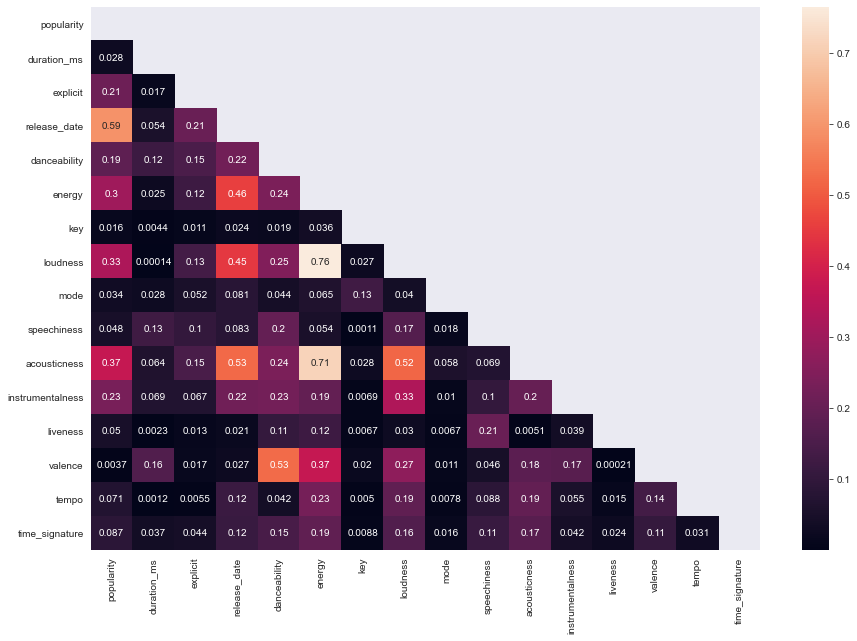

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)));

### Feature Exploration

In [17]:
def feature_corr(feature):
    feature_corr = tracks['popularity'].corr(tracks[feature])
    return print(f'Correlation to popularity with {feature} is {feature_corr}')

#### Artists

In [18]:
unique_artists = tracks['artists'].nunique()

In [19]:
print(f'Unique artists: {unique_artists}')

Unique artists: 114030


In [20]:
artist_pop = tracks.groupby('artists')['popularity'].sum().sort_values(ascending=False)
top_25 = artist_pop[:25]

In [21]:
top_25

artists
['Die drei ???']                              140705
['TKKG Retro-Archiv']                          58554
['Bibi Blocksberg']                            49785
['Benjamin Blümchen']                          42288
['Bibi und Tina']                              31641
['Queen']                                      29352
['Fünf Freunde']                               22190
['Elvis Presley']                              21779
['Pink Floyd']                                 21489
['Taylor Swift']                               21467
['The Rolling Stones']                         20985
['The Beatles']                                20129
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     19653
['Fleetwood Mac']                              18128
['Frank Sinatra']                              17152
['Julio Iglesias']                             16896
['Metallica']                                  16637
['Luis Miguel']                                15802
['BTS']                               

Text(0, 0.5, 'sum popularity')

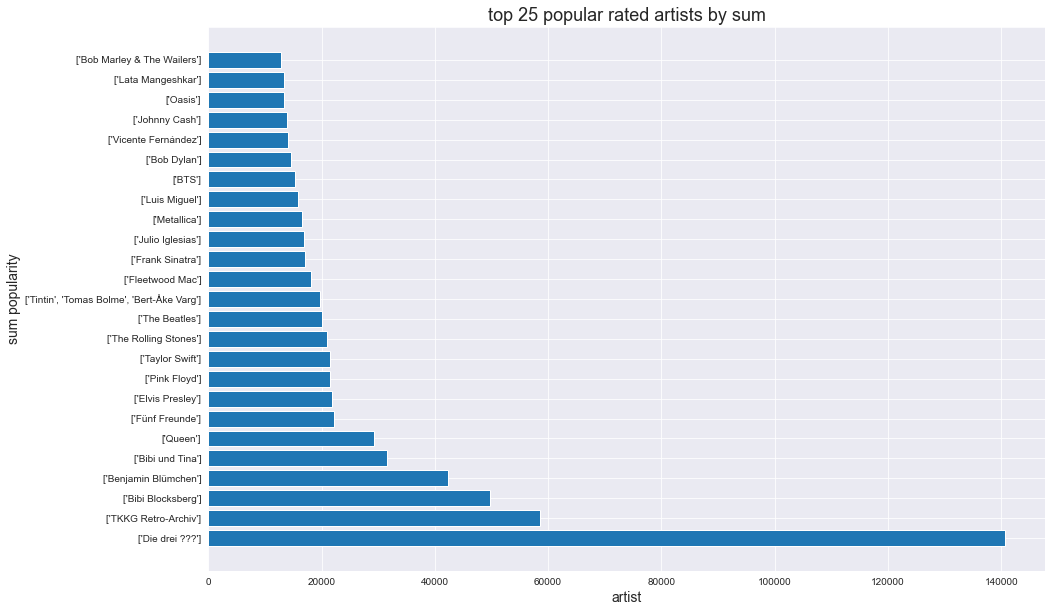

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25.index, top_25.values)
ax.set_title('top 25 popular rated artists by sum', fontsize=18)
ax.set_xlabel('artist', fontsize=14)
ax.set_ylabel('sum popularity', fontsize=14)

In [23]:
tracks['pop_artists_100songs'] = tracks['artists'].map(tracks['artists'].value_counts() > 100)

In [24]:
tracks.shape

(584663, 18)

In [25]:
pop_artists = tracks[tracks['pop_artists_100songs']== True]

In [26]:
pop_artists['pop_artists_100songs'].value_counts()

True    114304
Name: pop_artists_100songs, dtype: int64

In [27]:
pop_artists

popularity  duration_ms  explicit               artists  release_date  \
2                0       181640         0   ['Ignacio Corsini']          1922   
3                0       176907         0   ['Ignacio Corsini']          1922   
9                0       181173         0   ['Ignacio Corsini']          1922   
19               0       153533         0   ['Ignacio Corsini']          1922   
22               0       181440         0   ['Ignacio Corsini']          1922   
...            ...          ...       ...                   ...           ...   
586521          35       289480         0          ['Jay Chou']          2014   
586580          49       307520         0  ['Hillsong Worship']          2016   
586608           1        40680         0  ['Armin van Buuren']          2018   
586619           1        41739         0  ['Armin van Buuren']          2020   
586621          47       266383         0          ['Jay Chou']          2019   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
2              0.434  0.1770    1   -21.180     1       0.0512      0.994000   
3              0.321  0.0946    7   -27.961     1       0.0504      0.995000   
9              0.548  0.0391    6   -23.228     1       0.1530      0.996000   
19             0.370  0.3720    2   -17.138     1       0.0865      0.985000   
22             0.339  0.0958    8   -26.944     1       0.0530      0.994000   
...              ...     ...  ...       ...   ...          ...           ...   
586521         0.523  0.5720    1    -6.834     1       0.0274      0.356000   
586580         0.408  0.5190    9    -8.732     1       0.0311      0.106000   
586608         0.572  0.6660   11   -10.493     0       0.3080      0.137000   
586619         0.597  0.9530    1    -7.136     1       0.1240      0.000151   
586621         0.507  0.5010    0    -9.475     1       0.0287      0.282000   

        instrumentalness  liveness  valence    tempo  time_signature  \
2               0.021800    0.2120    0.457  130.418               5   
3               0.918000    0.1040    0.397  169.980               3   
9               0.933000    0.1480    0.612   75.595               3   
19              0.000681    0.9290    0.753  159.669               4   
22              0.969000    0.1230    0.219   86.279               3   
...                  ...       ...      ...      ...             ...   
586521          0.000001    0.1210    0.306  106.943               4   
586580          0.000000    0.9600    0.212  141.883               4   
586608          0.000000    0.5640    0.957  129.118               3   
586619          0.249000    0.6840    0.184  138.006               4   
586621          0.000022    0.0947    0.134  137.975               4   

        pop_artists_100songs  
2                       True  
3                       True  
9                       True  
19                      True  
22                      True  
...                      ...  
586521                  True  
586580                  True  
586608                  True  
586619                  True  
586621                  True  

[114304 rows x 18 columns]

In [28]:
top_pop_artists = pop_artists.groupby('artists')['popularity'].mean().sort_values(ascending=False)
top_pop_artists

artists
['Drake']                                                 62.689320
['Taylor Swift']                                          60.813031
['Arctic Monkeys']                                        60.028037
['BTS']                                                   59.482625
['Eminem']                                                58.302817
                                                            ...    
['Franz Joseph Haydn', 'Pro Arte Quartet']                 0.000000
['Arthur Conan Doyle']                                     0.000000
['Janusz Korczak']                                         0.000000
['Юрий Тынянов']                                           0.000000
['Radclyffe Hall', 'Alice White', 'Synthesized Voice']     0.000000
Name: popularity, Length: 557, dtype: float64

In [29]:
top_25_artists = top_pop_artists[:25]
top_25_artists

artists
['Drake']                                                     62.689320
['Taylor Swift']                                              60.813031
['Arctic Monkeys']                                            60.028037
['BTS']                                                       59.482625
['Eminem']                                                    58.302817
['Lana Del Rey']                                              58.127660
['Linkin Park']                                               55.884298
['Jorge & Mateus']                                            52.468750
['Rammstein']                                                 51.451389
['Red Hot Chili Peppers']                                     50.698225
['Jack Johnson']                                              50.596491
['Green Day']                                                 50.588235
['Maná']                                                      49.633028
['Demi Lovato']                                         

Text(0, 0.5, 'artist')

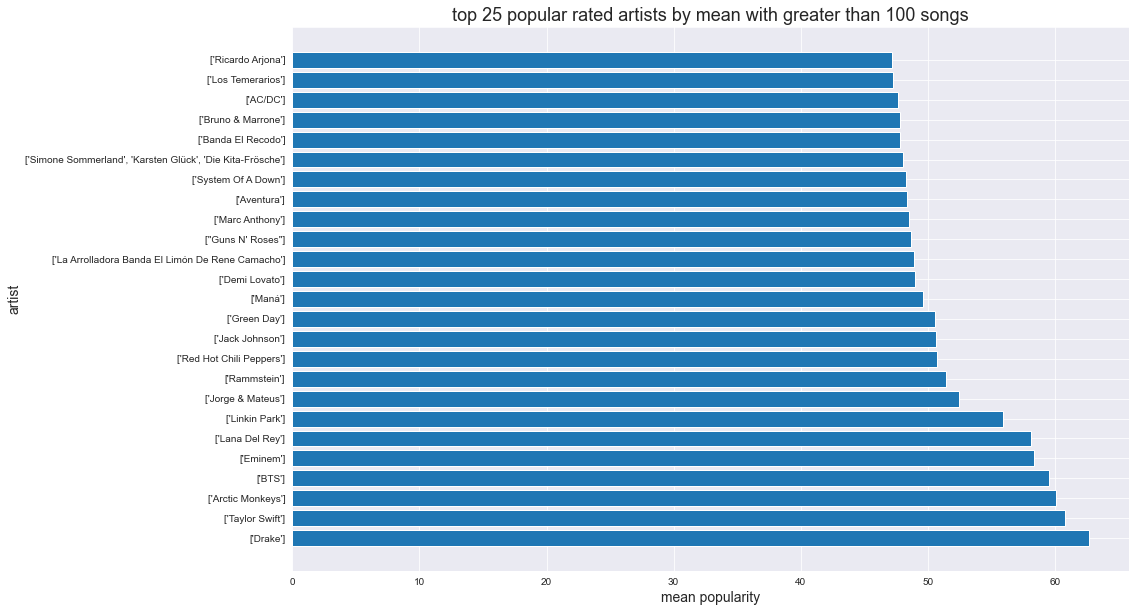

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25_artists.index, top_25_artists.values)
ax.set_title('top 25 popular rated artists by mean with greater than 100 songs', fontsize=18)
ax.set_xlabel('mean popularity', fontsize=14)
ax.set_ylabel('artist', fontsize=14)

In [31]:
tracks['mean'] = tracks.groupby('artists')['popularity'].transform('mean')

In [32]:
tracks['count'] = tracks.groupby('artists')['popularity'].transform('count')

<AxesSubplot:xlabel='count', ylabel='Density'>

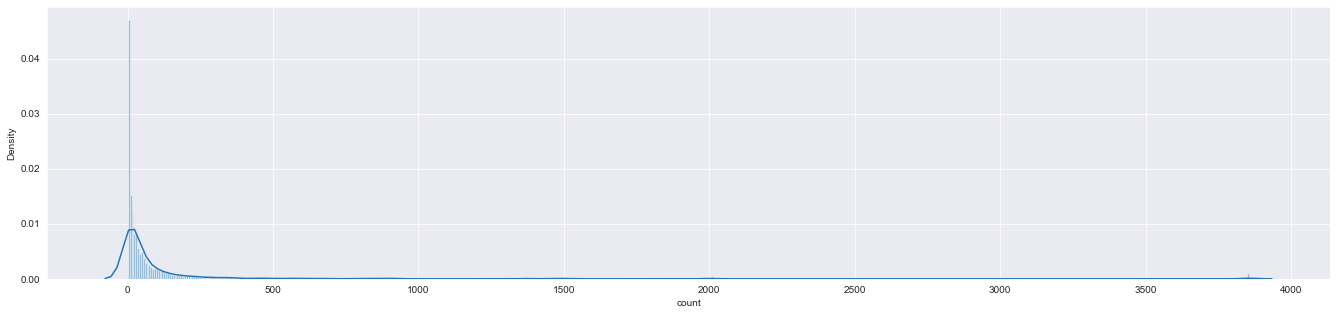

In [33]:
fig, ax = plt.subplots(figsize=(23,5))
sns.distplot(tracks['count'], bins = 600, ax=ax)

<AxesSubplot:xlabel='count'>

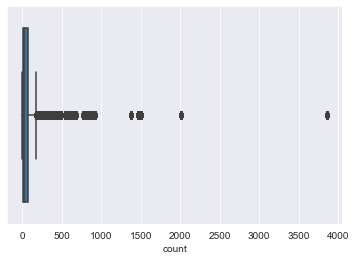

In [34]:
sns.boxplot(tracks['count'])

<AxesSubplot:xlabel='count'>

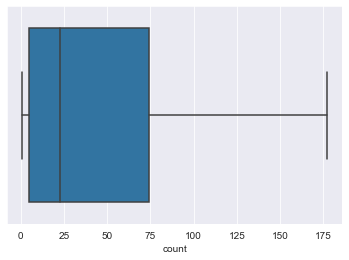

In [35]:
sns.boxplot(tracks['count'], showfliers=False)

In [36]:
multiple = tracks[['artists', 'mean']].loc[tracks['count']>900].value_counts(ascending=False).reset_index()
multiple

artists       mean     0
0                            ['Die drei ???']  36.489886  3856
1                       ['TKKG Retro-Archiv']  29.189432  2006
2                       ['Benjamin Blümchen']  28.192000  1500
3                         ['Bibi Blocksberg']  34.052668  1462
4                         ['Lata Mangeshkar']   9.754745  1370
5                           ['Bibi und Tina']  34.580328   915
6  ['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']  21.716022   905

#### Explicit

explicit (0 = No explicit content, 1 = Explicit content)

In [37]:
feature_corr('explicit')

Correlation to popularity with explicit is 0.21253530386223143


In [38]:
explicit=tracks['explicit']
y_explicit = ['no explicit', 'explicit']

Text(0.5, 1.0, 'Explicit vs No Explicit')

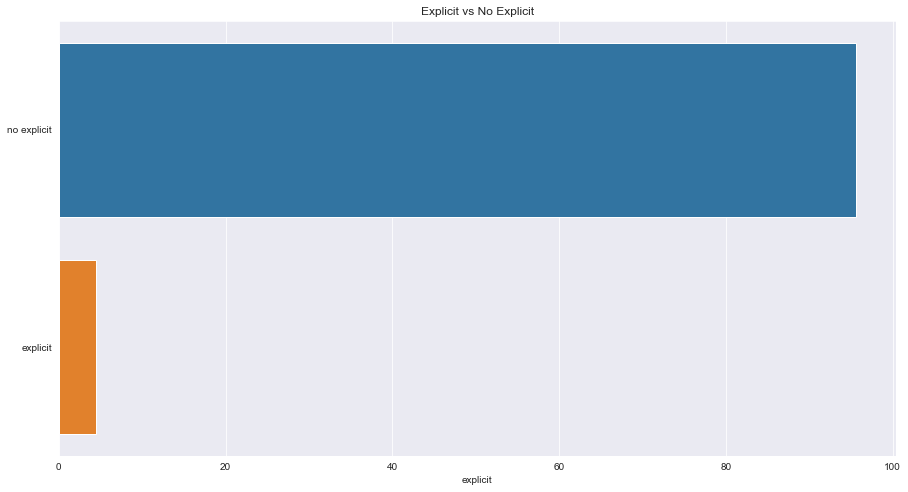

In [39]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(explicit.value_counts(normalize=True)*100,y=y_explicit, data=tracks, ax=ax)
ax.set_title('Explicit vs No Explicit')

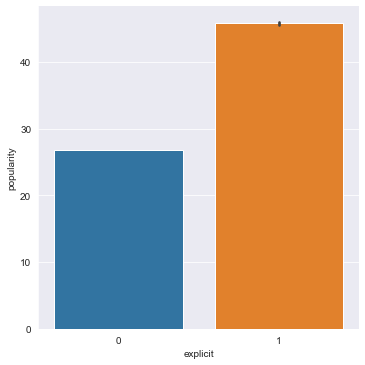

In [40]:
sns.catplot(data=tracks, kind='bar', x='explicit', y='popularity')

#### Key

In [41]:
tracks['popularity'].corr(tracks['key'])

0.015541091149826589

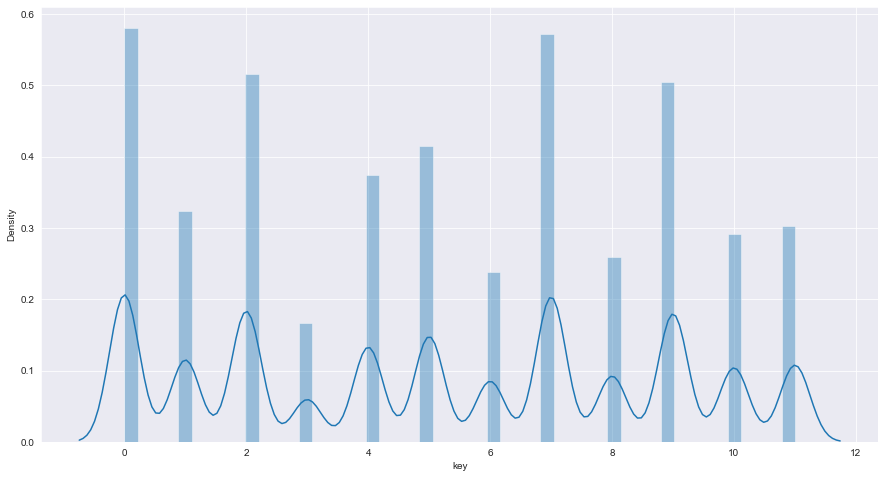

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['key'], ax=ax);

In [43]:
tracks['key'].value_counts(normalize=True)

0     0.127812
7     0.125826
2     0.113489
9     0.111138
5     0.091436
4     0.082225
1     0.071085
11    0.066625
10    0.064225
8     0.056985
6     0.052517
3     0.036636
Name: key, dtype: float64

#### Mode

mode (0 = Minor, 1 = Major)


In [44]:
tracks['mode'].value_counts(normalize=True)

1    0.658947
0    0.341053
Name: mode, dtype: float64

In [45]:
tracks['mode'].value_counts().index

Int64Index([1, 0], dtype='int64')

Text(0, 0.5, '%')

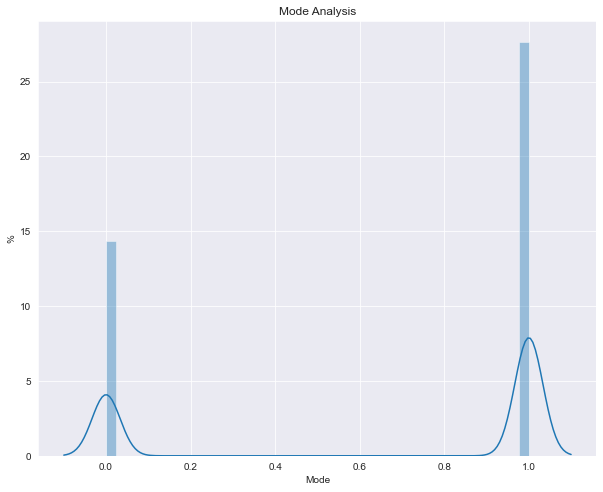

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(tracks['mode'], ax=ax)
ax.set_title('Mode Analysis')
ax.set_xlabel('Mode')
ax.set_ylabel('%')
#ax.set_xticks(['Minor', 'Major'])

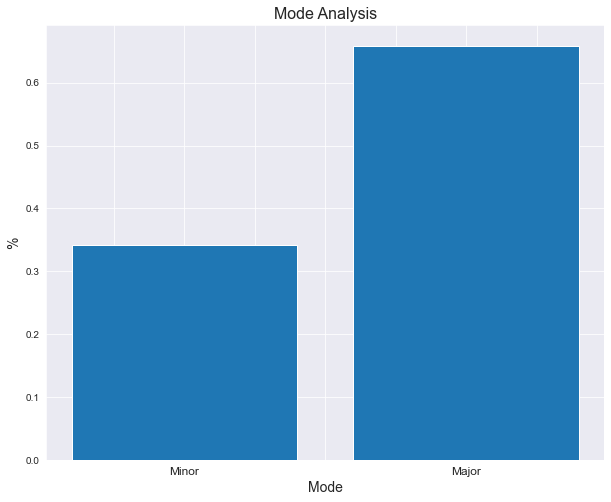

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(tracks['mode'].value_counts().index, tracks['mode'].value_counts(normalize=True).values)
ax.set_title('Mode Analysis', fontsize=16)
ax.set_xlabel('Mode', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_xticklabels([' ', ' ', 'Minor', ' ', ' ', ' ', 'Major'], fontsize=12);

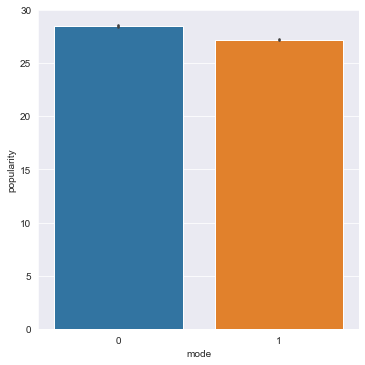

In [48]:
sns.catplot(data=tracks, kind='bar', x='mode', y='popularity')

#### Time Signature

In [49]:
feature_corr('time_signature')

Correlation to popularity with time_signature is 0.0868947454988907


<BarContainer object of 5 artists>

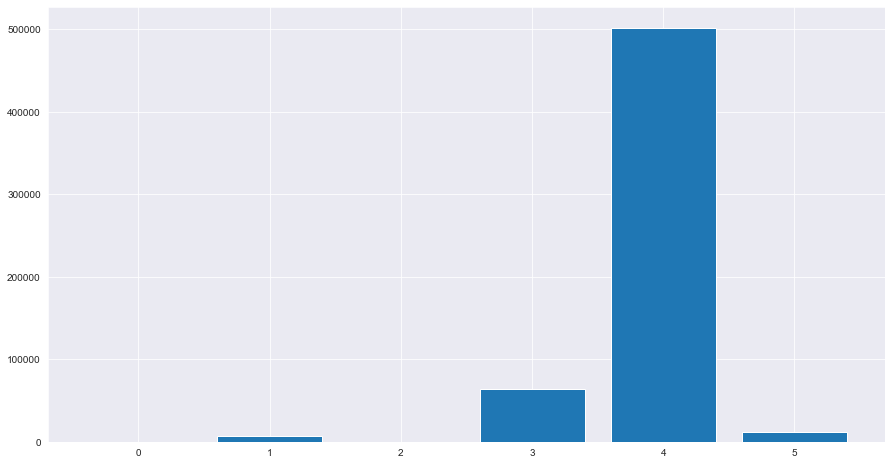

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(tracks['time_signature'].value_counts().index, tracks['time_signature'].value_counts().values)

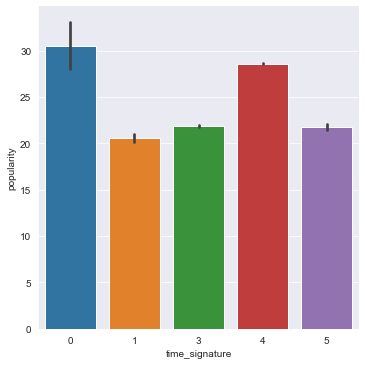

In [51]:
sns.catplot(data=tracks, kind='bar', x='time_signature', y='popularity')

### song attributes

In [52]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   popularity            584663 non-null  int64  
 1   duration_ms           584663 non-null  int64  
 2   explicit              584663 non-null  int64  
 3   artists               584663 non-null  object 
 4   release_date          584663 non-null  int64  
 5   danceability          584663 non-null  float64
 6   energy                584663 non-null  float64
 7   key                   584663 non-null  int64  
 8   loudness              584663 non-null  float64
 9   mode                  584663 non-null  int64  
 10  speechiness           584663 non-null  float64
 11  acousticness          584663 non-null  float64
 12  instrumentalness      584663 non-null  float64
 13  liveness              584663 non-null  float64
 14  valence               584663 non-null  float64
 15  

In [53]:
def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of popularity'''
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(tracks[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    feature_pop_mean = tracks.groupby(feature)['popularity'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_pop_mean.index, feature_pop_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Popularity', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Popularity', fontsize=14)
    return plt.show();

#### Danceability

In [54]:
feature_corr('danceability')

Correlation to popularity with danceability is 0.18801923603338333


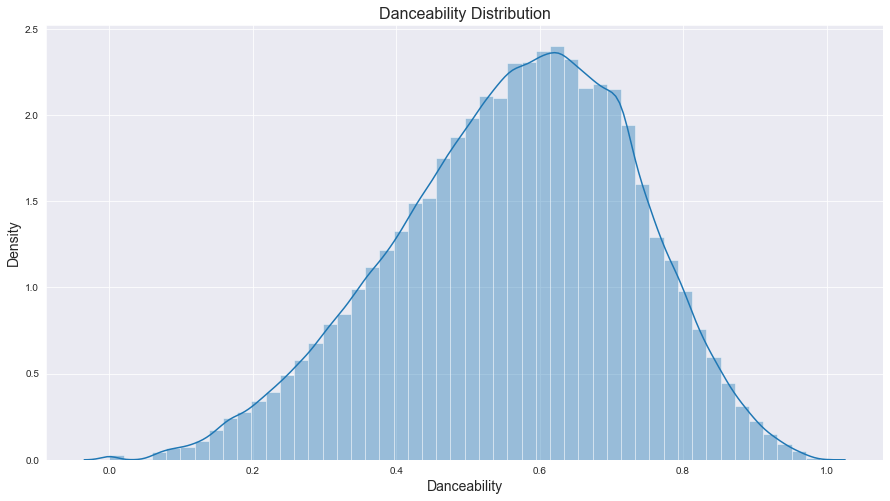

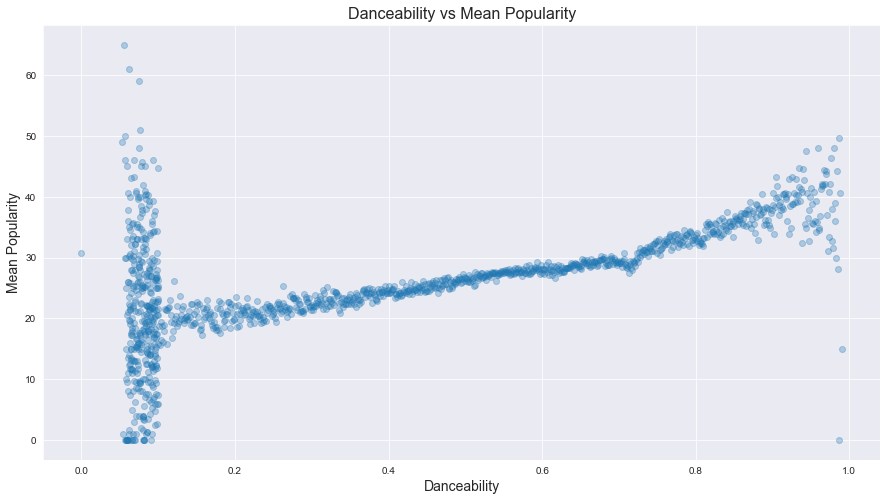

In [55]:
feature_analysis('danceability')

#### Energy

In [56]:
feature_corr('energy')

Correlation to popularity with energy is 0.3029963744049277


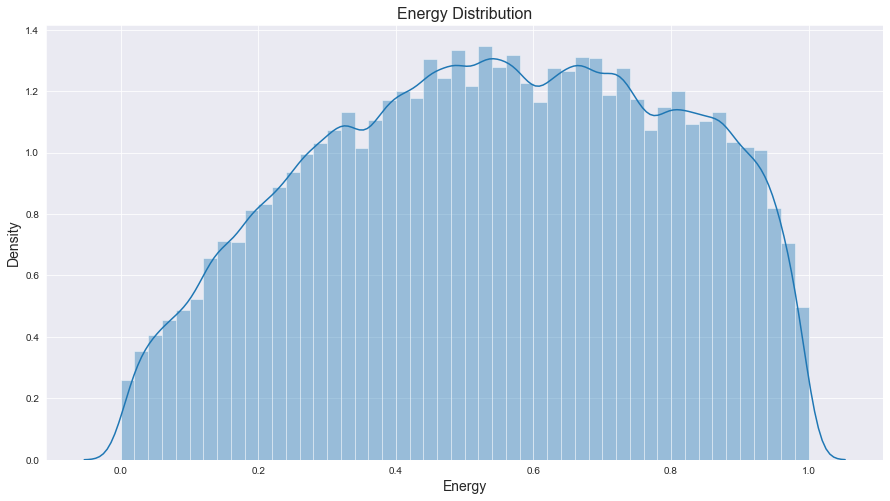

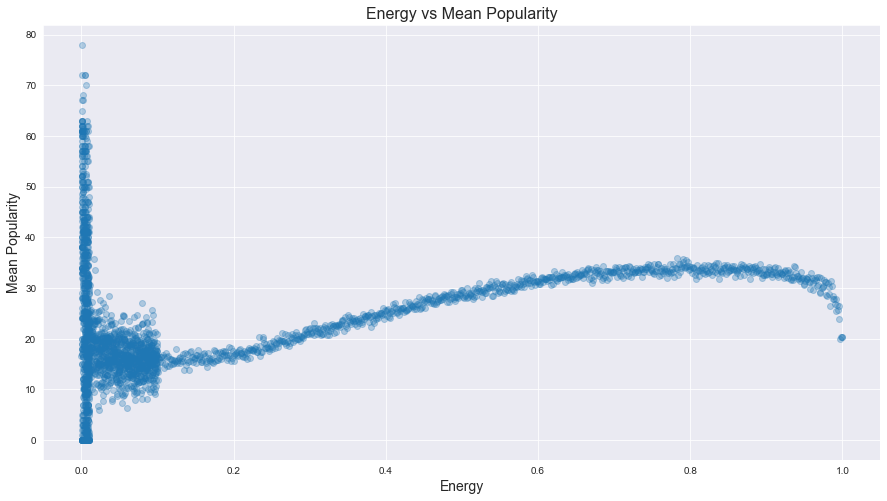

In [57]:
feature_analysis('energy')

#### Acousticness

In [58]:
feature_corr('acousticness')

Correlation to popularity with acousticness is -0.3720031423200711


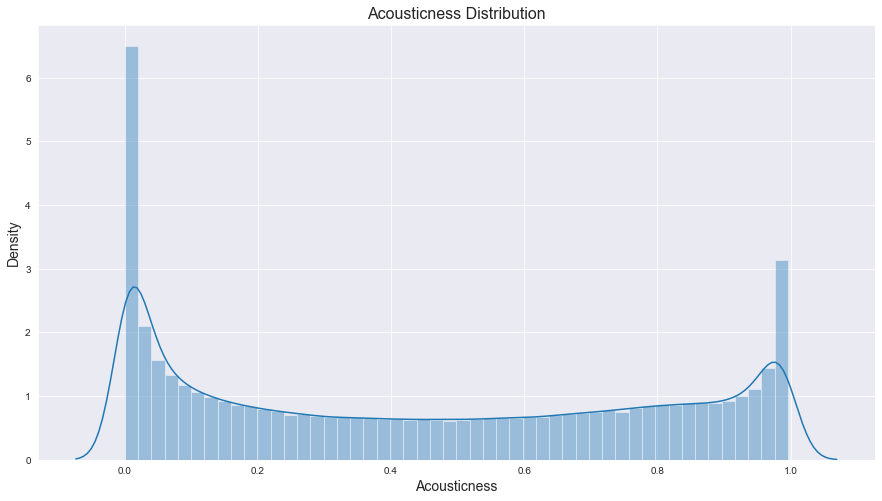

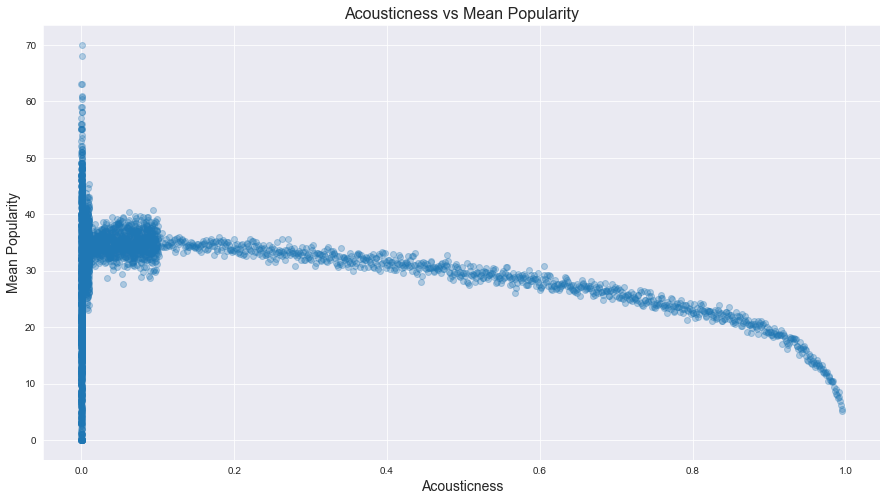

In [59]:
feature_analysis('acousticness')

#### Loudness

In [60]:
feature_corr('loudness')

Correlation to popularity with loudness is 0.32848111278596537


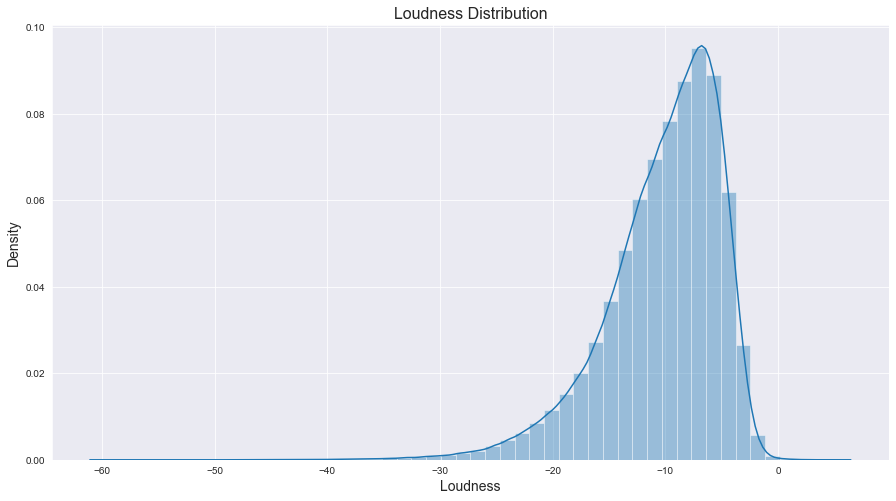

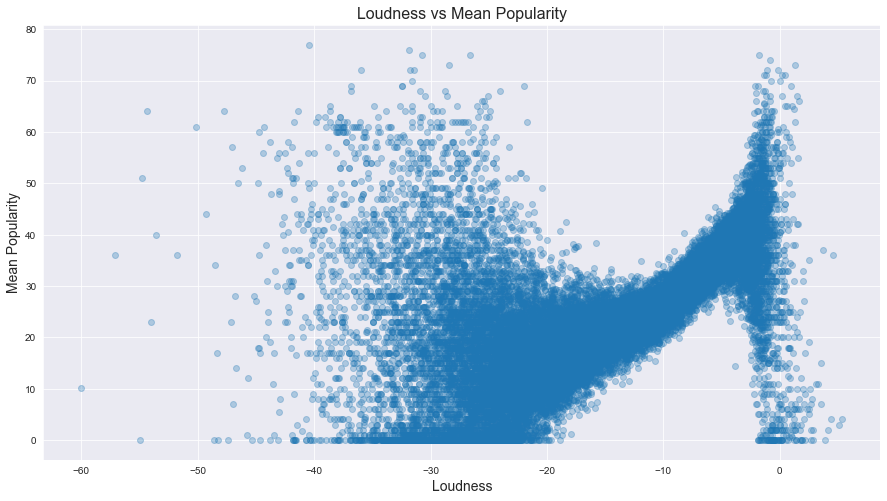

In [61]:
feature_analysis('loudness')

#### Speechiness

In [62]:
feature_corr('speechiness')

Correlation to popularity with speechiness is -0.04805705855431659


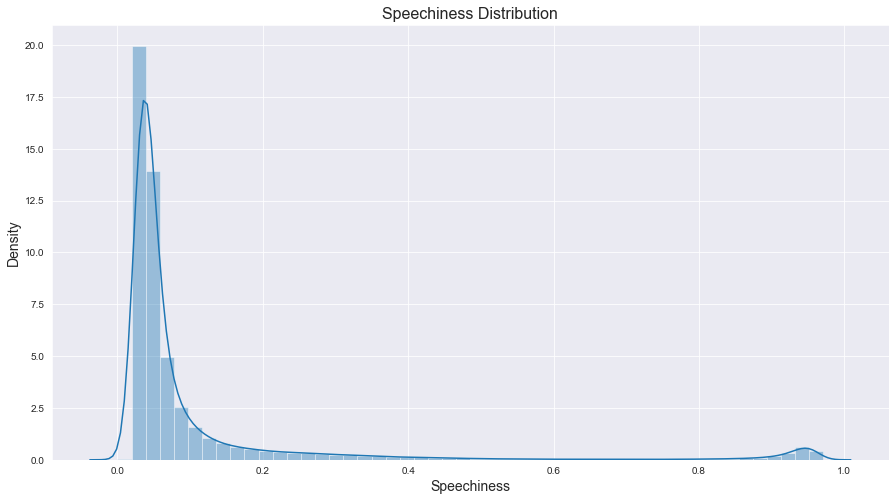

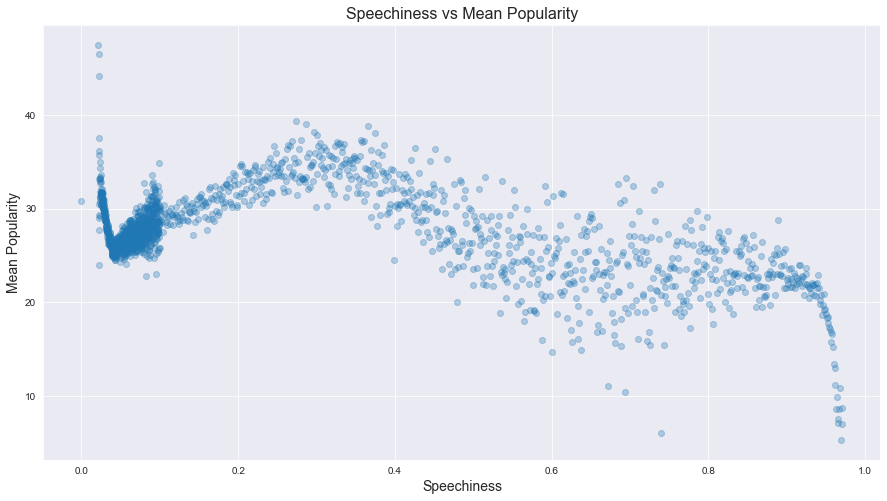

In [63]:
feature_analysis('speechiness')

#### Instrumentalness

In [64]:
feature_corr('instrumentalness')

Correlation to popularity with instrumentalness is -0.23447899687232618


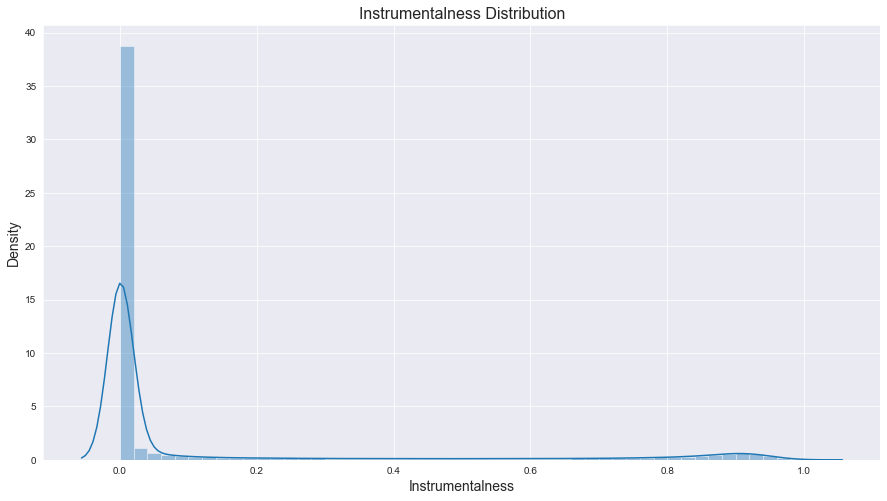

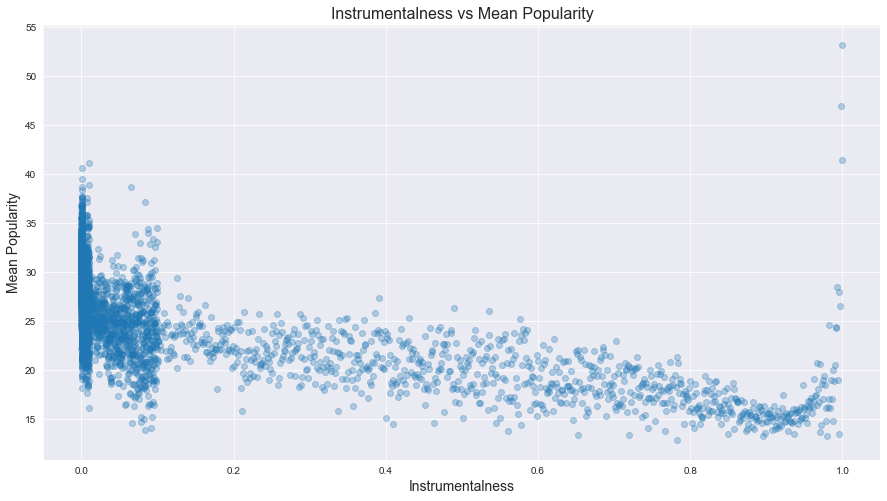

In [65]:
feature_analysis('instrumentalness')

#### Liveness

In [66]:
feature_corr('liveness')

Correlation to popularity with liveness is -0.049657502602716674


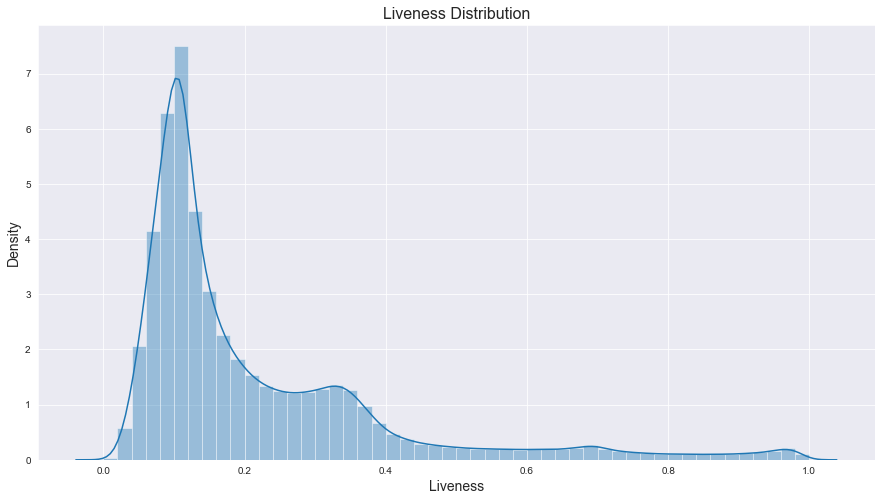

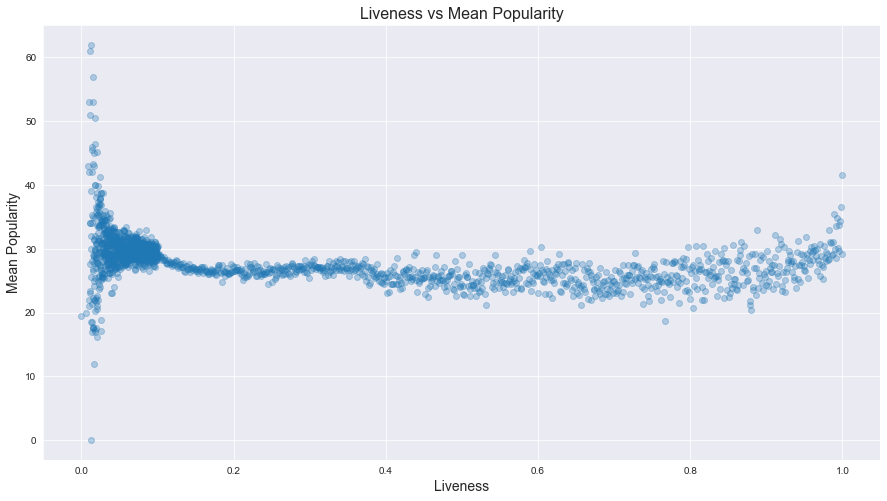

In [67]:
feature_analysis('liveness')

#### Valence

In [68]:
feature_corr('valence')

Correlation to popularity with valence is 0.003714630943866018


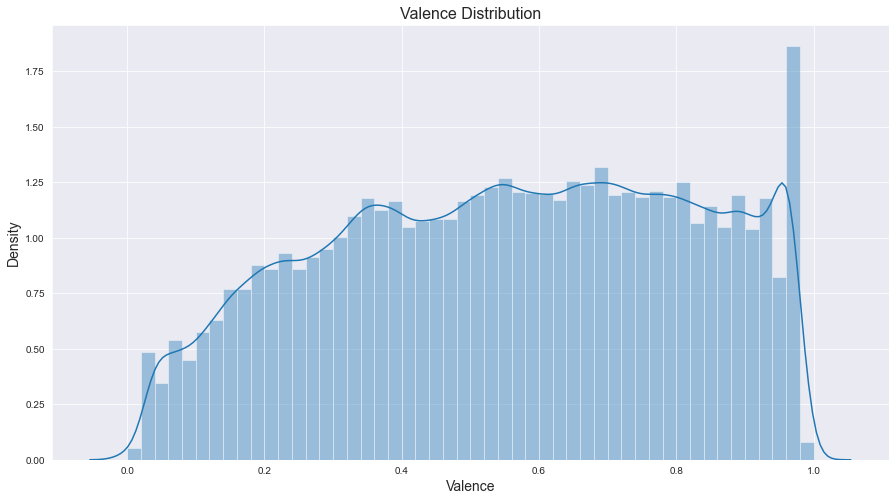

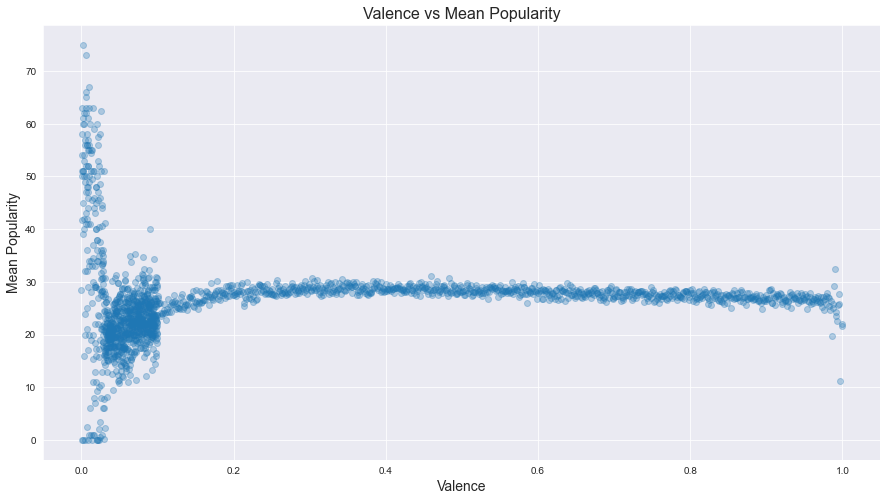

In [69]:
feature_analysis('valence')

#### Tempo

In [70]:
feature_corr('tempo')

Correlation to popularity with tempo is 0.07070413564749503


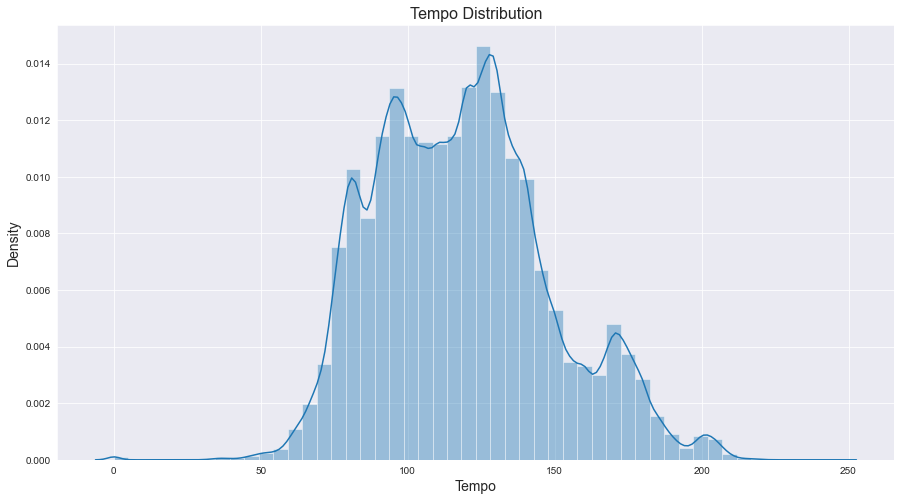

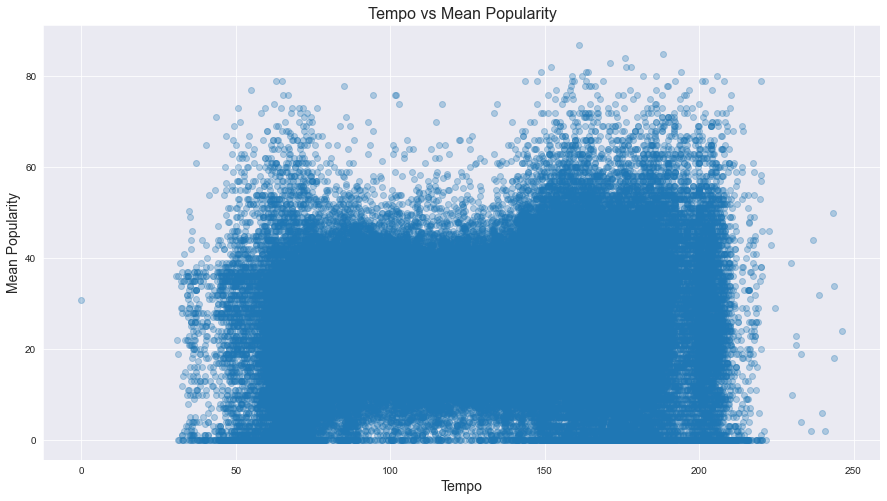

In [71]:
feature_analysis('tempo')

#### Duration

In [72]:
feature_corr('duration_ms')

Correlation to popularity with duration_ms is 0.028154897893097573


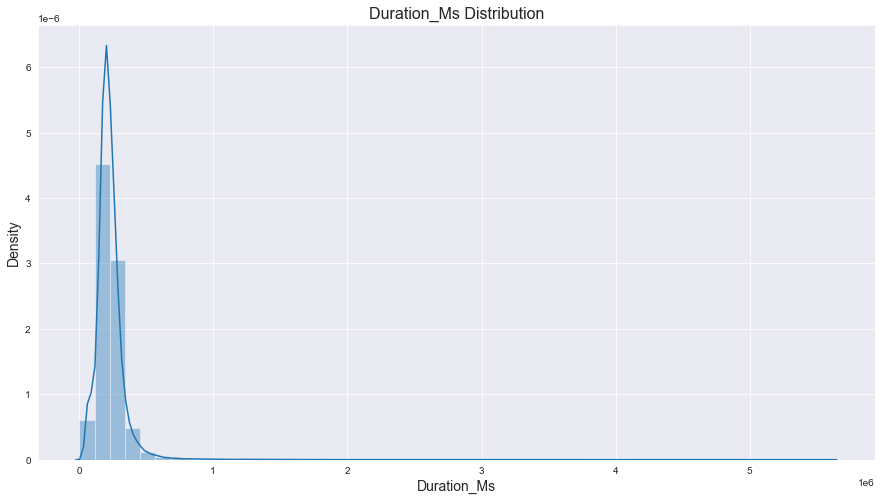

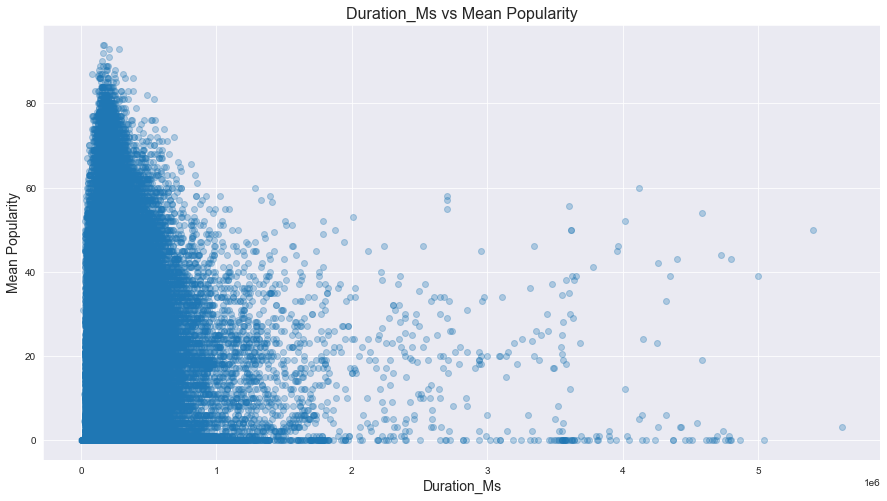

In [73]:
feature_analysis('duration_ms')

## Data Preparation

The initial variables dropped earlier were song title, song id, and artists id as those are not helpful for predictions. The artists column is converted to the mean of their popularity.

#### Splitting Target and Predictors

In [74]:
# Separating the target from the predictors
X = tracks.drop(['popularity', 'pop_artists_100songs'], axis=1)
y = tracks['popularity']

#### Splitting Training Set and Validation Set

In [75]:
# Separating the training set from the validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Transforming Artists to Numeric

In [76]:
# Transforming the artists column into the mean of their popularity
class ArtistTransformer():
    """ Transforms artists column in df to mean popularity and changes values
    where artists appear less than mincount with y.mean() and more than max count with 0
    MinCnt: Min amount of times artist appears in data
    MaxCnt: Max times artists appear in dataset"""
    
    
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None
  
    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X

In [77]:
# Fitting and transforming on X_train and transforming X_test
artists_transformer = ArtistTransformer(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

In [78]:
# Dropping mean as it's a derivative of our target, popularity, and highly correlated with it
X_train = X_train.drop('mean', axis=1)
X_test = X_test.drop('mean', axis=1)

#### OneHotEncoding Categoricals

In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

In [80]:
# Transforming X_train for keys
key_ohe = ohe.fit_transform(X_train[['key']])
keys_df = pd.DataFrame(key_ohe, index=X_train.index, columns=['key_'+str(i) for i in list(set(X_train['key'].values))[1:]])
X_train = pd.concat([X_train, keys_df], axis=1).drop('key', axis=1)

# Transforming X_test for keys
test_key_ohe = ohe.fit_transform(X_test[['key']])
test_keys_df = pd.DataFrame(test_key_ohe, index=X_test.index, columns=['key_'+str(i) for i in list(set(X_test['key'].values))[1:]])
X_test = pd.concat([X_test, test_keys_df], axis=1).drop('key', axis=1)

In [81]:
# Transforming X_train for time_signature
timesig_ohe = ohe.fit_transform(X_train[['time_signature']])
timesig_df = pd.DataFrame(timesig_ohe, index=X_train.index, columns=['timesig_'+str(i) for i in list(set(X_train['time_signature'].values))[1:]])
X_train = pd.concat([X_train, timesig_df], axis=1).drop('time_signature', axis=1)

# Transforming X_test for time_signature
test_timesig_ohe = ohe.fit_transform(X_test[['time_signature']])
test_timesig_df = pd.DataFrame(test_timesig_ohe, index=X_test.index, columns=['timesig_'+str(i) for i in list(set(X_test['time_signature'].values))[1:]])
X_test = pd.concat([X_test, test_timesig_df], axis=1).drop('time_signature', axis=1)

In [82]:
# Transforming X_train for explicit
explicit_ohe = ohe.fit_transform(X_train[['explicit']])
explicit_df = pd.DataFrame(explicit_ohe, index=X_train.index, columns=['explicit_'+str(i) for i in list(set(X_train['explicit'].values))[1:]])
X_train = pd.concat([X_train, explicit_df], axis=1).drop('explicit', axis=1)

# Transforming X_test for explicit
test_explicit_ohe = ohe.fit_transform(X_test[['explicit']])
test_explicit_df = pd.DataFrame(test_explicit_ohe, index=X_test.index, columns=['explicit_'+str(i) for i in list(set(X_test['explicit'].values))[1:]])
X_test = pd.concat([X_test, test_explicit_df], axis=1).drop('explicit', axis=1)

In [83]:
# Transforming X_train for mode
mode_ohe = ohe.fit_transform(X_train[['mode']])
mode_df = pd.DataFrame(mode_ohe, index=X_train.index, columns=['mode_'+str(i) for i in list(set(X_train['mode'].values))[1:]])
X_train = pd.concat([X_train, mode_df], axis=1).drop('mode', axis=1)

# Transforming X_test for mode
test_mode_ohe = ohe.fit_transform(X_test[['mode']])
test_mode_df = pd.DataFrame(test_mode_ohe, index=X_test.index, columns=['mode_'+str(i) for i in list(set(X_test['mode'].values))[1:]])
X_test = pd.concat([X_test, test_mode_df], axis=1).drop('mode', axis=1)

#### Standard Scaling the Dataset

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [85]:
X_train

duration_ms   artists  release_date  danceability    energy  loudness  \
39336     -0.818538 -0.210444     -1.033964     -0.751019 -0.978523 -0.042328   
261304    -0.526282  0.091341      0.282680      1.285618 -0.914962 -0.568098   
432101     0.421921  0.601209      0.151016     -0.895632  1.019663  0.993070   
403051     0.674647 -0.270312      0.370457     -0.293077  1.742665  0.417302   
64542      0.074324  1.296337      0.107128     -1.028195 -0.509763 -0.405308   
...             ...       ...           ...           ...       ...       ...   
110565     1.212578  0.091341      0.589897      1.092800  0.193376  0.825949   
260258    -0.355645 -1.482352      0.019351     -0.606406  0.904459  0.662766   
367107     0.279452 -0.181927      0.326568      0.164865 -0.239631  0.240536   
132565    -0.219595  0.091341     -2.833378     -0.407563  0.332414  0.248016   
122410    -0.309972 -1.794599     -2.043391      1.128953 -0.319082 -0.530698   

        speechiness  acousticness  instrumentalness  liveness  ...     key_8  \
39336     -0.435298      0.599905         -0.423872 -0.292219  ... -0.245322   
261304    -0.186929      1.515113          1.444471 -0.227067  ... -0.245322   
432101    -0.250542     -0.266531         -0.423864  0.723077  ... -0.245322   
403051    -0.318028     -1.289293          0.109940  0.847953  ... -0.245322   
64542     -0.404874      1.024516          3.177480 -0.520254  ... -0.245322   
...             ...           ...               ...       ...  ...       ...   
110565    -0.371684     -0.935006         -0.169747 -0.700510  ... -0.245322   
260258    -0.386620     -1.287577         -0.402745  0.641636  ... -0.245322   
367107    -0.420916      0.129390         -0.423784 -0.536542  ... -0.245322   
132565    -0.073531      1.320022         -0.423872  0.348449  ... -0.245322   
122410    -0.345686      1.538065          2.809075 -0.406237  ... -0.245322   

           key_9    key_10    key_11  timesig_1  timesig_3  timesig_4  \
39336   2.826662 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
261304 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
432101 -0.353774 -0.262245 -0.267422  -0.106426   2.842059  -2.465780   
403051 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
64542  -0.353774 -0.262245 -0.267422  -0.106426   2.842059  -2.465780   
...          ...       ...       ...        ...        ...        ...   
110565  2.826662 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
260258 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
367107 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
132565 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
122410 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   

        timesig_5  explicit_1    mode_1  
39336   -0.140352    -0.21432  0.719919  
261304  -0.140352    -0.21432  0.719919  
432101  -0.140352    -0.21432  0.719919  
403051  -0.140352    -0.21432  0.719919  
64542   -0.140352    -0.21432  0.719919  
...           ...         ...       ...  
110565  -0.140352    -0.21432 -1.389045  
260258  -0.140352    -0.21432  0.719919  
367107  -0.140352    -0.21432  0.719919  
132565  -0.140352    -0.21432  0.719919  
122410  -0.140352    -0.21432 -1.389045  

[438497 rows x 30 columns]

In [86]:
X_test

duration_ms   artists  release_date  danceability    energy  loudness  \
31917     -0.566199 -0.371743     -1.341181     -0.588329 -1.153314 -1.509011   
372690     0.097666  0.091341      1.116555      1.743560  0.622409  1.094248   
101277     0.425076  0.279848     -0.419530      1.442282 -0.382642 -1.060995   
191583     0.456090  0.765195     -0.682859     -0.883581  0.717750 -0.592900   
434855    -0.270544  1.288429      0.589897      0.592679  0.376112  1.237353   
...             ...       ...           ...           ...       ...       ...   
100886    -0.104103 -0.085279     -0.463418      0.568577  0.443645  0.236402   
184876    -0.025665  0.084330      0.414345      1.556767  1.142812  0.596233   
12938      0.057812 -1.865399     -2.218944     -2.498430 -1.818714 -1.547789   
373722     0.199753  0.091341      1.292108     -0.154489 -0.823594 -0.089374   
311174     0.198491  0.091341      0.765450     -1.172808  0.769393  1.291091   

        speechiness  acousticness  instrumentalness  liveness  ...     key_8  \
31917     -0.352324      1.391747         -0.423865 -0.232496  ... -0.245322   
372690    -0.326325     -0.926399         -0.423872 -0.525683  ... -0.245322   
101277     0.706425     -0.395636         -0.423840 -0.703767  ... -0.245322   
191583    -0.363940     -0.791557         -0.423301  0.343019  ... -0.245322   
434855    -0.435851     -1.061529         -0.423872 -0.629385  ... -0.245322   
...             ...           ...               ...       ...  ...       ...   
100886    -0.413171     -1.264137         -0.423793  0.440748  ... -0.245322   
184876    -0.129400     -1.093375         -0.423868  0.033544  ... -0.245322   
12938     -0.341814      0.866721         -0.069000 -0.635357  ... -0.245322   
373722    -0.404874      0.502359          0.015959 -0.585406  ... -0.245322   
311174    -0.402108     -1.259489         -0.422955  0.858812  ... -0.245322   

           key_9    key_10    key_11  timesig_1  timesig_3  timesig_4  \
31917  -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
372690 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
101277 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
191583 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
434855 -0.353774 -0.262245 -0.267422  -0.106426   2.842059  -2.465780   
...          ...       ...       ...        ...        ...        ...   
100886  2.826662 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
184876 -0.353774  3.813230 -0.267422  -0.106426  -0.351858   0.405551   
12938  -0.353774 -0.262245  3.739406  -0.106426   2.842059  -2.465780   
373722 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   
311174 -0.353774 -0.262245 -0.267422  -0.106426  -0.351858   0.405551   

        timesig_5  explicit_1    mode_1  
31917   -0.140352    -0.21432  0.719919  
372690  -0.140352    -0.21432  0.719919  
101277  -0.140352    -0.21432  0.719919  
191583  -0.140352    -0.21432  0.719919  
434855  -0.140352    -0.21432  0.719919  
...           ...         ...       ...  
100886  -0.140352    -0.21432  0.719919  
184876  -0.140352    -0.21432 -1.389045  
12938   -0.140352    -0.21432 -1.389045  
373722  -0.140352    -0.21432 -1.389045  
311174  -0.140352    -0.21432  0.719919  

[146166 rows x 30 columns]

## Modeling

In our modeling, we will be using Linear Regression as our starting model and build from there. We will be focusing our metric on mean squared error and converting it to root mean squared error while also looking at the r2 scores. 

#### First Simple Model with Acousticness

This model will be our baseline model of our target with one feature popularity is correlated with.

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [88]:
stratified_kfold = StratifiedKFold(n_splits=5, 
                                   random_state=42, 
                                   shuffle=True)

In [89]:
X_train_acoustic = X_train[['acousticness']]

In [90]:
lr_acoustic = LinearRegression()

In [91]:
lr_acoustic.fit(X_train_acoustic, y_train)

LinearRegression()

In [92]:
# Initiating dictionaries for mse and r2 scores
scores = {}
r2_scores = {}

In [93]:
base_cv = cross_validate(lr_acoustic, 
                         X_train_acoustic, 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

In [94]:
base_mse = base_cv['test_neg_mean_squared_error'].mean()
base_r2 = base_cv['test_r2'].mean()
scores['base_mse'] = base_mse
r2_scores['base_r2'] = base_r2
print(f'Base MSE: {base_mse}')
print(f'Base R2: {base_r2}')

Base MSE: -290.0165873272468
Base R2: 0.13846210905451944


#### Model without frequency of artists and artists

In [95]:
X_train_no_artists = X_train.drop(['artists', 'count'], axis=1)
X_test_no_artists = X_test.drop(['artists', 'count'], axis=1)

lr_no_artists = LinearRegression()

In [96]:
lr_no_artists.fit(X_train_no_artists, y_train)

LinearRegression()

In [97]:
no_artists_cv = cross_validate(lr_no_artists,
                              X_train_no_artists,
                              y_train,
                              cv=stratified_kfold,
                              scoring=['neg_mean_squared_error', 'r2'])

In [98]:
no_artists_mse = no_artists_cv['test_neg_mean_squared_error'].mean()
no_artists_r2 = no_artists_cv['test_r2'].mean()
scores['no_artists_train'] = no_artists_mse
r2_scores['no_artists_r2'] = no_artists_r2
print(f'No Artists/Count MSE: {no_artists_mse}')
print(f'No Artists/Count R2: {no_artists_r2}')

No Artists/Count MSE: -208.5372555141608
No Artists/Count R2: 0.380508686870188


#### Model with Features with Correlation greater than .25

This model will add features and explore linear regression with columns of correlation greater than .25 with popularity.

In [99]:
corr_lr = LinearRegression()

In [100]:
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))<0.25]

In [101]:
cols

['duration_ms',
 'danceability',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'count',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'timesig_1',
 'timesig_3',
 'timesig_4',
 'timesig_5',
 'explicit_1',
 'mode_1']

In [102]:
corr_lr.fit(X_train.drop(cols, axis=1), y_train)

LinearRegression()

In [103]:
corr_cv = cross_validate(corr_lr, 
                         X_train.drop(cols, axis=1), 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

In [104]:
corr_mse = corr_cv['test_neg_mean_squared_error'].mean()
corr_r2 = corr_cv['test_r2'].mean()
scores['corr_mse'] = corr_mse
r2_scores['corr_r2'] = corr_r2
print(f'Corr Train MSE: {corr_mse}')
print(f'Corr Train R2: {corr_r2}')

Corr Train MSE: -145.63166174101613
Corr Train R2: 0.5673792610698349


As expected, our score increased with more variables predicting our target.

#### Model with all Numeric Features

In this next model, we will add all the relevant numeric features to see if our scores improve.

In [105]:
lr_all = LinearRegression()

In [106]:
lr_all.fit(X_train, y_train)

LinearRegression()

In [107]:
lr_all_cv = cross_validate(lr_all, 
                           X_train, 
                           y_train, 
                           cv=stratified_kfold, 
                           scoring=['neg_mean_squared_error', 'r2'])

In [108]:
all_mse = lr_all_cv['test_neg_mean_squared_error'].mean()
all_r2 = lr_all_cv['test_r2'].mean()
scores['all_mse'] = all_mse
r2_scores['all_r2'] = all_r2
print(f'All Train MSE: {all_mse}')
print(f'All Train R2: {all_r2}')

All Train MSE: -132.05761496262411
All Train R2: 0.6077030274479351


Our model improved and we will continue with all the numeric features in our model.

#### Ridge CV

In [109]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=stratified_kfold)

In [110]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))

In [111]:
ridge_preds = ridge_cv.predict(X_train)

In [112]:
scores['ridge_mse'] = -mean_squared_error(y_train, ridge_preds)
r2_scores['ridge_r2'] = ridge_cv.score(X_train, y_train)
print(f'Ridge Train MSE: {-mean_squared_error(y_train, ridge_preds)}')
print(f'Ridge Train R2: {ridge_cv.score(X_train, y_train)}')

Ridge Train MSE: -132.03697828883168
Ridge Train R2: 0.6077643709081579


#### Decision Tree Regression

The next model we will be exploring is the Decision Tree Regressor model.

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [115]:
dtr_cv = cross_validate(dtr, 
                        X_train, 
                        y_train, 
                        cv=stratified_kfold,
                        scoring=['neg_mean_squared_error', 'r2'])

In [116]:
dtr_mse = dtr_cv['test_neg_mean_squared_error'].mean()
dtr_r2 = dtr_cv['test_r2'].mean()
scores['dtr_mse'] = dtr_mse
r2_scores['dtr_r2'] = dtr_r2
print(f'DTR Train MSE: {dtr_mse}')
print(f'DTR Train R2: {dtr_r2}')

DTR Train MSE: -191.44532888247622
DTR Train R2: 0.43128309554564764


#### Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [118]:
rfr = RandomForestRegressor(n_estimators=30, random_state=42, max_samples=.3)
rfr

RandomForestRegressor(max_samples=0.3, n_estimators=30, random_state=42)

In [119]:
params = {'max_depth': (5, 50, 100),
         'max_leaf_nodes': (100, 500)}

In [120]:
rfr_cv = GridSearchCV(rfr, 
                      cv=stratified_kfold, 
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      param_grid=params)

In [121]:
#rfr_cv = rfr_cv.fit(X_train, y_train)

In [122]:
filename = './pickle/rfr_cv'
#outfile= open(filename, 'wb')

#pickle.dump(rfr_cv,outfile)
#outfile.close()

In [123]:
infile = open(filename, 'rb')
rfr_cv = pickle.load(infile)
infile.close()

In [124]:
best_params = rfr_cv.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 50, 'max_leaf_nodes': 500}


In [125]:
rfr_gs_preds = rfr_cv.predict(X_train)

In [126]:
rfr_mse = -mean_squared_error(y_train, rfr_gs_preds)
scores['rfr_mse'] = rfr_mse

In [127]:
from sklearn.metrics import r2_score

In [128]:
rfr_mse = -mean_squared_error(y_train, rfr_gs_preds)
rfr_r2_score = r2_score(y_train, rfr_gs_preds)
r2_scores['rfr_r2'] = rfr_r2_score
print(f'RFR Train MSE: {rfr_mse}')
print(f'RFR Train R2: {rfr_r2_score}')

RFR Train MSE: -95.28541566775412
RFR Train R2: 0.716940394713043


In [129]:
rfr_model = RandomForestRegressor(max_depth=50, 
                            max_samples=0.3,
                            n_estimators=30, 
                            random_state=42,
                            max_leaf_nodes=500)

In [130]:
rfr = rfr_model.fit(X_train, y_train)

In [131]:
filename = './pickle/rfr'
#outfile= open(filename, 'wb')

#pickle.dump(rfr,outfile)
#outfile.close()

In [132]:
infile = open(filename, 'rb')
rfr = pickle.load(infile)
infile.close()

In [133]:
feat_impt = pd.DataFrame(rfr.feature_importances_, index=X_train.columns)
feat_impt

0
duration_ms       0.008542
artists           0.698338
release_date      0.185131
danceability      0.004403
energy            0.006027
loudness          0.005940
speechiness       0.003231
acousticness      0.011724
instrumentalness  0.015373
liveness          0.003725
valence           0.003935
tempo             0.004421
count             0.045623
key_1             0.000101
key_2             0.000109
key_3             0.000081
key_4             0.000091
key_5             0.000150
key_6             0.000082
key_7             0.000101
key_8             0.000153
key_9             0.000119
key_10            0.000115
key_11            0.000105
timesig_1         0.000040
timesig_3         0.000089
timesig_4         0.000092
timesig_5         0.000060
explicit_1        0.001950
mode_1            0.000150

In [134]:
sorted_importances = feat_impt.sort_values(by=0, ascending=True)

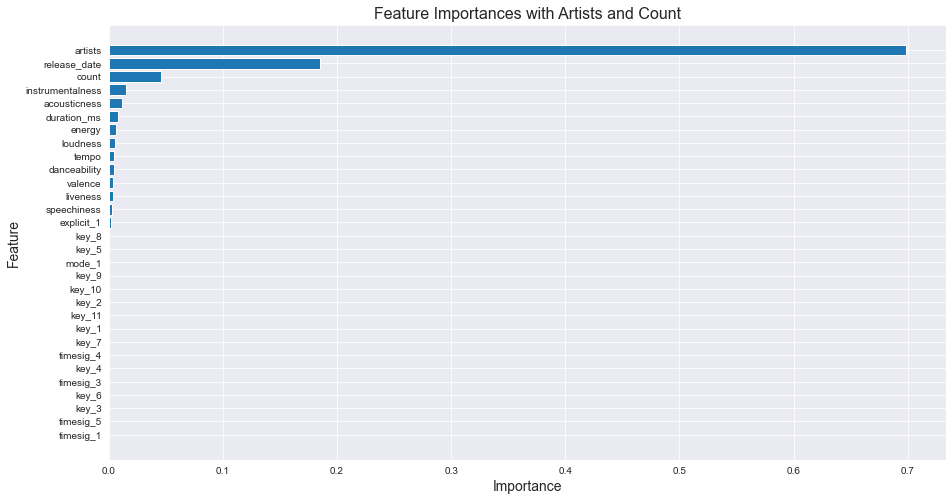

In [135]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(sorted_importances.index, sorted_importances[0])
ax.set_title('Feature Importances with Artists and Count', fontsize=16)
ax.set_ylabel('Feature', fontsize=14)
ax.set_xlabel('Importance', fontsize=14)
plt.savefig('./images/ft_impt_with_artists', bbox_inches='tight');

In [136]:
# Dropping higher importances for visibility
no_artist = feat_impt.drop(['artists', 'release_date', 'count'])
no_artist = no_artist.sort_values(by=0, ascending=True)

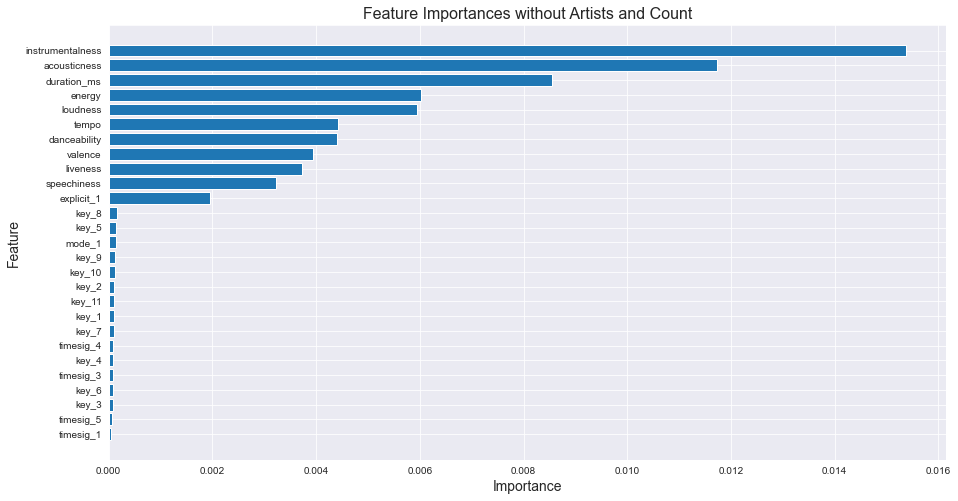

In [137]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(no_artist.index, no_artist[0])
ax.set_title('Feature Importances without Artists and Count', fontsize=16)
ax.set_ylabel('Feature', fontsize=14)
ax.set_xlabel('Importance', fontsize=14)
plt.savefig('./images/ft_impt_no_artists', bbox_inches='tight');

#### XGBoost

Our next model will go through XGBoost models.

In [138]:
import xgboost as xgb

In [139]:
xg_reg_model = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=.3, 
                          learning_rate=.3, 
                          max_depth=6,
                          alpha=.5, 
                          n_estimators=10,
                          n_jobs=-1,
                          eval_metric='rmse')

In [140]:
xg_reg = xg_reg_model.fit(X_train, y_train)

In [141]:
xgb_preds = xg_reg.predict(X_train)

In [142]:
xgb_score = -mean_squared_error(y_train, xgb_preds)
xgb_r2 = r2_score(y_train, xgb_preds)
print(f'XGB Base MSE Train: {xgb_score}')
print(f'XGB Base R2 Train: {xgb_r2}')

XGB Base MSE Train: -165.30969438766473
XGB Base R2 Train: 0.5089227819854589


In [143]:
scores['xgb_score'] = xgb_score
r2_scores['xgb_r2'] = xgb_r2

#### Grid Search with XGBoost

In [144]:
xg_gs_model = xgb.XGBRegressor(objective='reg:squarederror',
                               colsample_bytree=.3,
                               n_jobs=-1,
                               eval_metric='rmse')

In [145]:
parameters = {
    'max_depth': range(6, 14, 2),
    'learning_rate': [.2, .3, .4],
    'n_estimators': range(40, 60, 10),
}

In [146]:
xgb_gs = GridSearchCV(estimator=xg_gs_model,
                     param_grid=parameters,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     cv=stratified_kfold)

In [148]:
#best_xgb = xgb_gs.fit(X_train, y_train)

In [149]:
filename = './pickle/best_xgb'
#outfile= open(filename, 'wb')

#pickle.dump(best_xgb,outfile)
#outfile.close()

In [150]:
infile = open(filename, 'rb')
best_xgb = pickle.load(infile)
infile.close()

In [151]:
best_params = best_xgb.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 50}


In [152]:
best_xgb_preds = best_xgb.predict(X_train)

In [153]:
best_xgb_score = -mean_squared_error(y_train, best_xgb_preds)
best_xgb_r2 = r2_score(y_train, best_xgb_preds)
print(f'XGB Best Train MSE: {best_xgb_score}')
print(f'XGB Best Train R2: {best_xgb_r2}')

XGB Best Train MSE: -94.97849536238111
XGB Best Train R2: 0.7178521474706356


In [154]:
scores['best_xgb_score'] = best_xgb_score
r2_scores['best_xgb_r2'] = best_xgb_r2

#### Converting MSE to RMSE

In [155]:
# converting the MSE scores to RMSE
def f(x):
    return np.sqrt(-x)

rmse = {k: f(v) for k, v in scores.items()}

rmse

{'base_mse': 17.029873379659836,
 'no_artists_train': 14.440819073520753,
 'corr_mse': 12.06779440250024,
 'all_mse': 11.491632388943884,
 'ridge_mse': 11.490734453847224,
 'dtr_mse': 13.836377014322652,
 'rfr_mse': 9.761424878968958,
 'xgb_score': 12.857281765119124,
 'best_xgb_score': 9.745691117739218}

In [156]:
#Updating the key name and removing the old key, value pair

rmse['base_rmse'] = rmse['base_mse']
del rmse['base_mse']

rmse['no_artists_rmse'] = rmse['no_artists_train']
del rmse['no_artists_train']

rmse['corr_rmse'] = rmse['corr_mse']
del rmse['corr_mse']

rmse['all_rmse'] = rmse['all_mse']
del rmse['all_mse']

rmse['ridge_rmse'] = rmse['ridge_mse']
del rmse['ridge_mse']

rmse['dtr_rmse'] = rmse['dtr_mse']
del rmse['dtr_mse']

rmse['rfr_rmse'] = rmse['rfr_mse']
del rmse['rfr_mse']

rmse['xgb_rmse'] = rmse['xgb_score']
del rmse['xgb_score']

rmse['best_xgb_rmse'] = rmse['best_xgb_score']
del rmse['best_xgb_score']

In [157]:
# Converting train RMSE dictionary to dataframe
rmse_df = pd.DataFrame(list(rmse.items()), columns=['Model', 'Train_Score'])
rmse_df

Model  Train_Score
0        base_rmse    17.029873
1  no_artists_rmse    14.440819
2        corr_rmse    12.067794
3         all_rmse    11.491632
4       ridge_rmse    11.490734
5         dtr_rmse    13.836377
6         rfr_rmse     9.761425
7         xgb_rmse    12.857282
8    best_xgb_rmse     9.745691

In [158]:
# Converting train R2 dictionary to dataframe
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'Train_Score'])
r2_df

Model  Train_Score
0        base_r2     0.138462
1  no_artists_r2     0.380509
2        corr_r2     0.567379
3         all_r2     0.607703
4       ridge_r2     0.607764
5         dtr_r2     0.431283
6         rfr_r2     0.716940
7         xgb_r2     0.508923
8    best_xgb_r2     0.717852

## Evaluation

Below we will calculate our test scores for RMSE and R2.

In [159]:
test_rmse = {}
test_r2 = {}

In [160]:
# Base model
base_test_preds = lr_acoustic.predict(X_test[['acousticness']])
test_rmse['base_rmse'] = np.sqrt(mean_squared_error(y_test, base_test_preds))
test_r2['base_r2'] = r2_score(y_test, base_test_preds)

In [161]:
# No artists/count
no_artists_preds = lr_no_artists.predict(X_test_no_artists)
test_rmse['no_artists_rmse'] = np.sqrt(mean_squared_error(y_test, no_artists_preds))
test_r2['no_artists_r2'] = r2_score(y_test, no_artists_preds)

In [162]:
# Correlation > 0.25
corr_test_preds = corr_lr.predict(X_test.drop(cols, axis=1))
test_rmse['corr_rmse'] = np.sqrt(mean_squared_error(y_test, corr_test_preds))
test_r2['corr_r2'] = r2_score(y_test, corr_test_preds)

In [163]:
# All
all_test_preds = lr_all.predict(X_test)
test_rmse['all_rmse'] = np.sqrt(mean_squared_error(y_test, all_test_preds))
test_r2['all_r2'] = r2_score(y_test, all_test_preds)

In [164]:
# Ridge CV
ridge_cv_preds = ridge_cv.predict(X_test)
test_rmse['ridge_rmse'] = np.sqrt(mean_squared_error(y_test, ridge_cv_preds))
test_r2['ridge_r2'] = r2_score(y_test, ridge_cv_preds)

In [165]:
# Decision Tree Regression
dtr_test_preds = dtr.predict(X_test)
test_rmse['dtr_rmse'] = np.sqrt(mean_squared_error(y_test, dtr_test_preds))
test_r2['dtr_r2'] = r2_score(y_test, dtr_test_preds)

In [166]:
# Random Forest Regression
rfr_test_preds = rfr_cv.predict(X_test)
test_rmse['rfr_rmse'] = np.sqrt(mean_squared_error(y_test, rfr_test_preds))
test_r2['rfr_r2'] = r2_score(y_test, rfr_test_preds)

In [167]:
# XGBoost
xgb_test_preds = xg_reg.predict(X_test)
test_rmse['xgb_rmse'] = np.sqrt(mean_squared_error(y_test, xgb_test_preds))
test_r2['xgb_r2'] = r2_score(y_test, xgb_test_preds)

In [168]:
# XGBoost Grid Search CV
xgb_best_test_preds = best_xgb.predict(X_test)
test_rmse['xgb_best_rmse'] = np.sqrt(mean_squared_error(y_test, xgb_best_test_preds))
test_r2['xgb_best_r2'] = r2_score(y_test, xgb_test_preds)

In [169]:
test_rmse

{'base_rmse': 16.999922522596705,
 'no_artists_rmse': 14.434375107381515,
 'corr_rmse': 12.601198397796113,
 'all_rmse': 12.074086430017172,
 'ridge_rmse': 12.074081626627901,
 'dtr_rmse': 14.173557131082688,
 'rfr_rmse': 10.574646466355341,
 'xgb_rmse': 13.092475807251189,
 'xgb_best_rmse': 10.712830153253902}

In [170]:
test_r2

{'base_r2': 0.1381294210575884,
 'no_artists_r2': 0.3786387784726002,
 'corr_r2': 0.5264434256975754,
 'all_r2': 0.5652328400659423,
 'ridge_r2': 0.5652331859895048,
 'dtr_r2': 0.40089093780249485,
 'rfr_r2': 0.6665122502015788,
 'xgb_r2': 0.4887989564038625,
 'xgb_best_r2': 0.4887989564038625}

In [171]:
# Converting RMSE test dictionary to dataframe
test_rmse_df = pd.DataFrame(list(test_rmse.items()), columns=['Model_Test', 'Test_Score'])
test_rmse_df

Model_Test  Test_Score
0        base_rmse   16.999923
1  no_artists_rmse   14.434375
2        corr_rmse   12.601198
3         all_rmse   12.074086
4       ridge_rmse   12.074082
5         dtr_rmse   14.173557
6         rfr_rmse   10.574646
7         xgb_rmse   13.092476
8    xgb_best_rmse   10.712830

In [172]:
# Combining RMSE train and test scores into one dataframe
rmse_df = pd.concat([rmse_df, test_rmse_df], axis=1, join='inner')
rmse_df = rmse_df.drop('Model_Test', axis=1)
rmse_df

Model  Train_Score  Test_Score
0        base_rmse    17.029873   16.999923
1  no_artists_rmse    14.440819   14.434375
2        corr_rmse    12.067794   12.601198
3         all_rmse    11.491632   12.074086
4       ridge_rmse    11.490734   12.074082
5         dtr_rmse    13.836377   14.173557
6         rfr_rmse     9.761425   10.574646
7         xgb_rmse    12.857282   13.092476
8    best_xgb_rmse     9.745691   10.712830

In [173]:
# Converting R2 test dictionary to dataframe
test_r2_df = pd.DataFrame(list(test_r2.items()), columns=['Model_Test', 'Test_Score'])
test_r2_df

Model_Test  Test_Score
0        base_r2    0.138129
1  no_artists_r2    0.378639
2        corr_r2    0.526443
3         all_r2    0.565233
4       ridge_r2    0.565233
5         dtr_r2    0.400891
6         rfr_r2    0.666512
7         xgb_r2    0.488799
8    xgb_best_r2    0.488799

In [174]:
# Combining R2 train and test scores into one dataframe
r2_df = pd.concat([r2_df, test_r2_df], axis=1, join='inner')
r2_df = r2_df.drop('Model_Test', axis=1)
r2_df

Model  Train_Score  Test_Score
0        base_r2     0.138462    0.138129
1  no_artists_r2     0.380509    0.378639
2        corr_r2     0.567379    0.526443
3         all_r2     0.607703    0.565233
4       ridge_r2     0.607764    0.565233
5         dtr_r2     0.431283    0.400891
6         rfr_r2     0.716940    0.666512
7         xgb_r2     0.508923    0.488799
8    best_xgb_r2     0.717852    0.488799

#### Plotting Train and Test Scores

Below we will plot the training and test scores for RMSE and R2 to evaluate how the models did on the test set in comparison to the training set.

#### RMSE Scores

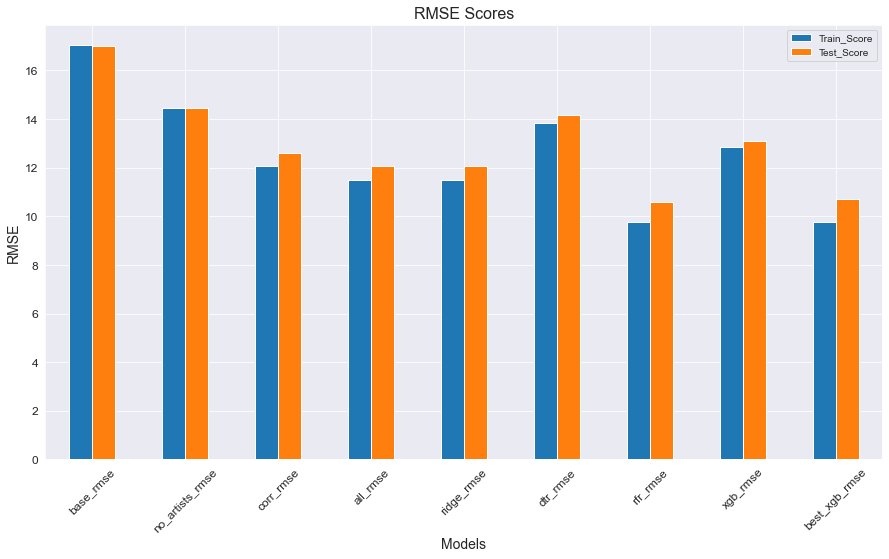

In [175]:
fig, ax = plt.subplots(figsize=(15,8))
rmse_df.plot(ax=ax, kind='bar')
ax.set_title('RMSE Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
ax.set_yticklabels(range(0,18, 2), fontsize=12)
ax.set_xticklabels(rmse_df['Model'], fontsize=12, rotation=45)
plt.savefig('./images/rmse_scores', bbox_inches='tight');

#### R2 Scores

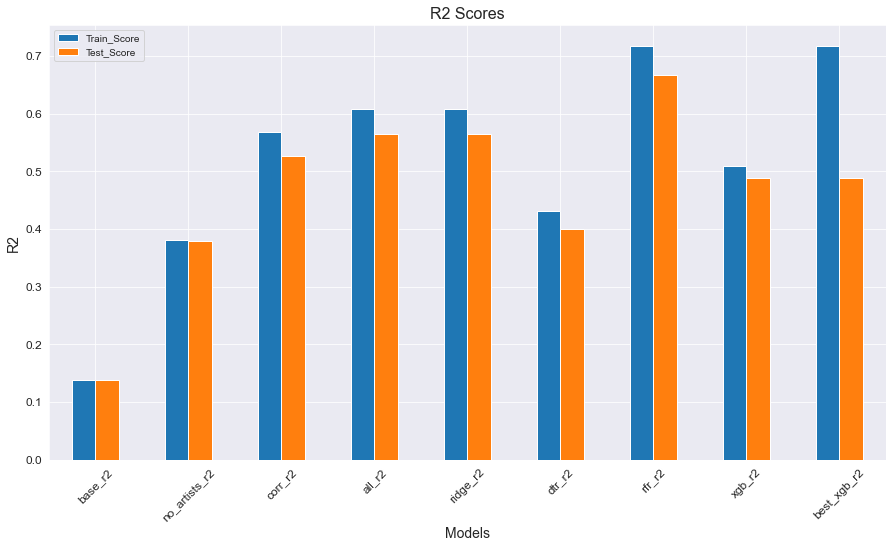

In [176]:
fig, ax = plt.subplots(figsize=(15,8))
r2_df.plot(ax=ax, kind='bar')
ax.set_title('R2 Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2', fontsize=14)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], fontsize=12)
ax.set_xticklabels(r2_df['Model'], fontsize=12, rotation=45)
plt.savefig('./images/r2_scores', bbox_inches='tight');

The RMSE scores for our linear regression models were almost the same, indicating that the training and test predictions performed roughly the same. The decision tree model also performed roughly the same on the training and validation set. The random forest regression model and the XGBoost models performed poorly on the validation set, indicating those models were overfit. Although the models were overfit, they still performed better than our baseline model. With these results, we are somewhat confident in our best model, the random forest regression model, and its ability generalize and predict popularity.

## Conclusions

As a result of this project, I believe we can recommend music production studios to make new songs with popular artists and to make the songs lean on the side of not acoustic and have instruments included. Some reasons why this analysis might not fully solve the problem is due to the parameter tuning of the model and the size of the data. Subsetting the data and dividing it out into genre models will most likely lead to better predictions for specific songs, which is also a next step improvement on the project.